<b><h2><center>German Credit Analysis Case Study</center></h2></b>

## Problem Statement

### Context

To minimize loss from the bank’s perspective, the bank needs a decision rule regarding whom to approve the loan and whom not to. An applicant’s demographic and socio-economic profiles are considered by loan managers before a decision is taken regarding his/her loan application.
In this dataset, each entry represents a person who takes credit from a bank. Each person is classified as a good or bad credit risk according to the set of attributes. 
 

### Objective:
The objective is to build a predictive model on this data to help the bank decide on whether to approve a loan to a prospective applicant.

 
### Dataset:
- Age (Numeric: Age in years)
- Sex (Categories: male, female)
- Job (Categories: 0: unskilled and non-resident, 1: unskilled and resident, 2: skilled, 3: highly skilled)
- Housing (Categories: own, rent, or free)
- Saving accounts (Categories: little, moderate, quite rich, rich)
- Checking account (Categories: little, moderate, rich)
- Credit amount (Numeric: Amount of credit in DM - Deutsche Mark)
- Duration (Numeric: Duration for which the credit is given in months)
- Purpose (Categories: car, furniture/equipment,radio/TV, domestic appliances, repairs, education, business, vacation/others)
- Risk (0 - Person is not at risk, 1 - Person is at risk (defaulter))

## Importing Libraries

In [1]:
# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

# Data management libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing/data transformation libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer, KNNImputer

# Modeling data preparation libraries 
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Classification libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier)
from xgboost import XGBClassifier

# Up/downsampling libraries
from imblearn.under_sampling import TomekLinks, RandomUnderSampler
from imblearn.over_sampling import SMOTE, RandomOverSampler

# Model evaluation libraries
from sklearn.metrics import (accuracy_score, recall_score, precision_score, f1_score,
                             confusion_matrix, make_scorer)

# Pipeline building libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

# Setting the theme and fontsize of figures
sns.set_theme(style = 'darkgrid', font_scale = 1.13)

# Restricting the float value of a dataframe to 3 decimal points
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Removing the limit for the number of displayed columns in a dataframe
pd.set_option("display.max_columns", None)

# Mounting the drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Loading the Dataset

In [2]:
# Reading the dataset 
data_orig = pd.read_csv('/content/drive/MyDrive/Python_files/German_Credit.csv')

# Ensuring the original data remains untouched
df = data_orig.copy()

## Overview of the Dataset

### Viewing the Top and Bottom of the Dataset 

In [3]:
# Top 5 records
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


In [4]:
# Bottom 5 records
df.tail()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,0
996,40,male,3,own,little,little,3857,30,car,0
997,38,male,2,own,little,NaN,804,12,radio/TV,0
998,23,male,2,free,little,little,1845,45,radio/TV,1
999,27,male,2,own,moderate,moderate,4576,45,car,0


### Shape of the Dataset

In [5]:
print('The dataset has {} records and {} features.'.format(df.shape[0], df.shape[1]))

The dataset has 1000 records and 10 features.


### Datatypes of the Columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [7]:
# Renaming columns so that there is no blank in the name
for col in df.columns.tolist():
    new_col_name = col.replace(' ', '_')
    df.rename(columns = {col: new_col_name}, inplace = True) 
df.head(3)

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0


In [8]:
# Capitalizing/alphabetizing the classes of categorical variables
df['Sex'].replace(['male', 'female'], ['Male', 'Female'], inplace = True)
df['Housing'].replace(['free', 'own', 'rent'], ['Free', 'Own', 'Rent'], inplace = True)
df['Purpose'].replace(['radio/TV', 'education', 'furniture/equipment', 'car', 'business', 
                       'domestic appliances', 'repairs', 'vacation/others'],
                      ['Radio/TV', 'Education', 'Furniture', 'Car', 'Business', 
                       'Appliances', 'Repairs', 'Others'], inplace = True)
df['Saving_accounts'].replace(['little', 'moderate', 'quite rich', 'rich'], 
                              ['Little', 'Moderate', 'Quite Rich', 'Rich'], inplace = True)
df['Checking_account'].replace(['little', 'moderate', 'rich'], 
                               ['Little', 'Moderate', 'Rich'], inplace = True)
df['Job'].replace([0, 1, 2, 3], ['Unskilled & Non-Resident', 'Unskilled & Resident', 
                                 'Skilled', 'Highly Skilled'], inplace = True)
df['Risk'].replace([0, 1], ['Non-Defaulter', 'Defaulter'], inplace = True)

### Viewing the Missing Values and Duplicated Records

In [9]:
print('The dataset has {} duplicates.'.format(df.duplicated().sum()))

The dataset has 0 duplicates.


In [10]:
# Percentage of missing values in columns with missing entries
for col in df.columns.tolist():
    if df[col].isnull().sum():
      col_name = col.replace('_', ' ')
      print('{}% of values for {} are missing.'.
            format(round(df[col].isnull().sum()/df.shape[0]*100, 1), col_name.lower()))

18.3% of values for saving accounts are missing.
39.4% of values for checking account are missing.


### Statsitical Summary

In [11]:
# Statistical summary of numerical variables
df.describe(include = np.number).T

,count,mean,std,min,25%,50%,75%,max
Age,1000.000,35.546,11.375,19.000,27.000,33.000,42.000,75.000
Credit_amount,1000.000,3271.258,2822.737,250.000,1365.500,2319.500,3972.250,18424.000
Duration,1000.000,20.903,12.059,4.000,12.000,18.000,24.000,72.000


#### Observations:

*   The age of clients span in the very wide range of 19 to 75  (reasonable that nobody under 18 appears), with median and mean falling at ~ 36 and 33, respectively.
*   Credit amount shows a very high variablity with std > 85%, and its minimum and maximum being located at 250 DM and ~ 18500 DM.
*   Duration of loans ranges from 4 months to 72 months, with median and mean residing at 18 and ~ 12 months, respectively, signaling right skewedness.   

In [12]:
# Statistical summary of categorical variables
cat_summary = df.describe(include = ['object', 'category']).T
cat_summary['frac'] = cat_summary['freq']/cat_summary['count']
cat_summary

,count,unique,top,freq,frac
Sex,1000,2,Male,690,0.690
Job,1000,4,Skilled,630,0.630
Housing,1000,3,Own,713,0.713
Saving_accounts,817,4,Little,603,0.738
Checking_account,606,3,Little,274,0.452
Purpose,1000,8,Car,337,0.337
Risk,1000,2,Non-Defaulter,700,0.700


#### Observations:

*   ~ 18% and ~ 39% of values for saving accounts and checking accounts features are missing, respectively.
*   Most clients are male (63%), skilled (63%) in their own profession and own their places of residence (71.3%).
*   Most customers have been categorized as unskilled and resident.
*   The most popular reason for taking out loans is buying cars. 
*   The vast majority of the clients have 'little' cash in their saving accounts. The popularity (45.2%) of them also 'little' funds in their checking accounts too. Note that the percentages have been calculated for known entries.
*  30% of debtors default.  



### Replacing NaN Values by 'unknown'


In [13]:
df.Saving_accounts.replace(np.nan, 'Unknown', inplace = True)
df.Checking_account.replace(np.nan, 'Unknown', inplace = True)
df['Saving_accounts'].value_counts(1)
df['Checking_account'].value_counts(1)

Unknown    0.394
Little     0.274
Moderate   0.269
Rich       0.063
Name: Checking_account, dtype: float64

### Creating Numerical Equivalents for Features That can be Both

Here, an equivalent numerical column has been created for categorical variables with natural order.


In [14]:
df['Saving_accounts_num'] = df['Saving_accounts'].replace(['Unknown', 'Little', 'Moderate', 'Quite Rich', 'Rich'], 
                               [-1, 1, 2, 3, 4])
df['Checking_account_num'] = df['Checking_account'].replace(['Unknown', 'Little', 'Moderate', 'Rich'], 
                               [-1, 1, 2, 3])
df['Job_num'] = df['Job'].replace(['Unskilled & Non-Resident', 'Unskilled & Resident', 'Skilled', 'Highly Skilled'],
                                               [1, 2, 3, 4])
df['Risk_num'] = df['Risk'].replace(['Non-Defaulter', 'Defaulter'], [0, 1])

In [15]:
# Converting object-type columns and integers that are originally categories into categories

# Making a list of all categorical variables
cat_features = df.select_dtypes(include = 'object').columns.tolist()
cat_features.extend(['Job', 'Risk'])

# Looping over categorical vars and converting them into 'category' columns
for col in cat_features:
    df[col] = pd.Categorical(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Age                   1000 non-null   int64   
 1   Sex                   1000 non-null   category
 2   Job                   1000 non-null   category
 3   Housing               1000 non-null   category
 4   Saving_accounts       1000 non-null   category
 5   Checking_account      1000 non-null   category
 6   Credit_amount         1000 non-null   int64   
 7   Duration              1000 non-null   int64   
 8   Purpose               1000 non-null   category
 9   Risk                  1000 non-null   category
 10  Saving_accounts_num   1000 non-null   int64   
 11  Checking_account_num  1000 non-null   int64   
 12  Job_num               1000 non-null   int64   
 13  Risk_num              1000 non-null   int64   
dtypes: category(7), int64(7)
memory usage: 63.0 KB


In [16]:
df.Saving_accounts_num.unique()

array([-1,  1,  3,  4,  2])

## EDA

In [17]:
# Auxiliary function for annotating the bars in a countplot
def countplot_labeling(cntplt, data, perc = True, decimal = 1):
  ''' This function gets a countplot and the dataset that has generated
  the plot to produce the values corresponding to each bar (category).
  If perc = True, percentages will be shown.'''

  from math import isnan

  total = data.shape[0]  # total number of values in the dataset
  for p in cntplt.patches:
        height_val = float(p.get_height())
        if(isnan(height_val)):
          height_val = 0
        if(abs(height_val - round(height_val)) < 1e-6):
          height_val = int(height_val)  
        if perc == True:
          # percentage of each category
          label = "{:.1f}%".format(100*height_val/total)
        else:
          label = "{}".format(round(height_val,decimal))  # count of each category
        x = p.get_x() + p.get_width()/2  # width of the plot
        y = p.get_height()  # height of the plot

        if(height_val == 0):
          label = '0'

        # annotate the bar
        cntplt.annotate(label, (x, y), ha = "center", va = "center", size = 12, xytext = (0, 5), textcoords = "offset points") 

### Univariate Analysis

**`Sex`**

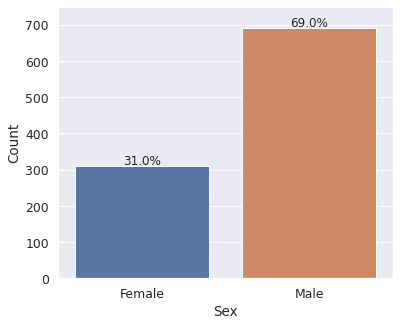

In [18]:
plt.figure(figsize = (6, 5));
cntplt = sns.countplot(data = df, x = 'Sex');
countplot_labeling(cntplt, df);
plt.ylabel('Count');
plt.ylim(0, 750);

**`Job`**

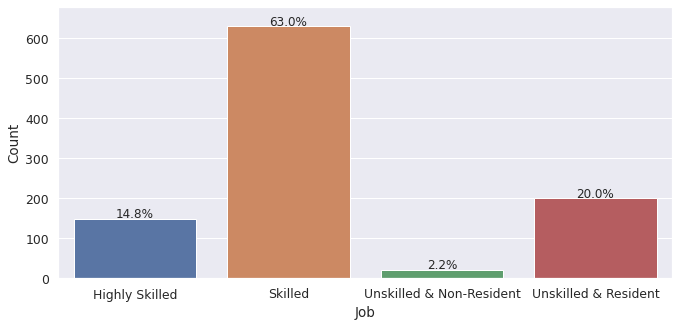

In [19]:
plt.figure(figsize = (11, 5));
cntplt = sns.countplot(data = df, x = 'Job');
countplot_labeling(cntplt, df);
plt.ylabel('Count');
plt.ylim(0, 680);

**`Housing`**

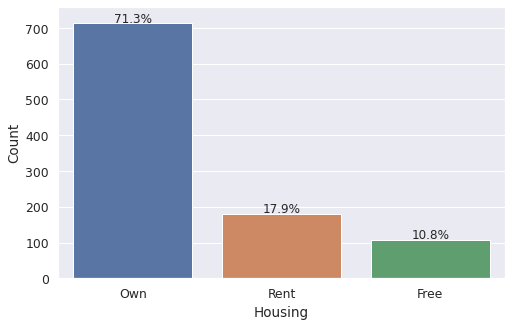

In [20]:
plt.figure(figsize = (8, 5));
cntplt = sns.countplot(data = df, x = 'Housing', 
                       order = df.Housing.value_counts(ascending = False).index.tolist());
countplot_labeling(cntplt, df);
plt.ylabel('Count');
plt.ylim(0, 760);

**`Saving Account`**

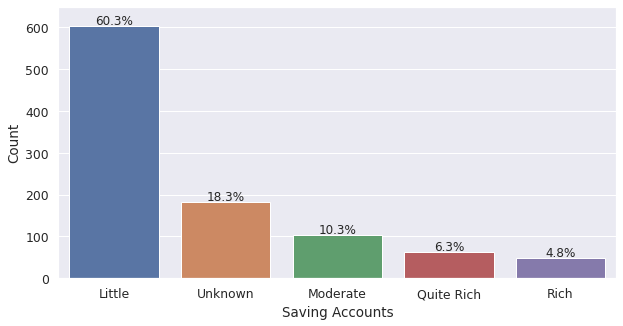

In [21]:
plt.figure(figsize = (10, 5));
cntplt = sns.countplot(data = df, x = 'Saving_accounts',
                       order = df.Saving_accounts.value_counts(ascending = False).index.tolist());
countplot_labeling(cntplt, df);
plt.xlabel('Saving Accounts');
plt.ylabel('Count');
plt.ylim(0, 650);

**`Checking Account`**

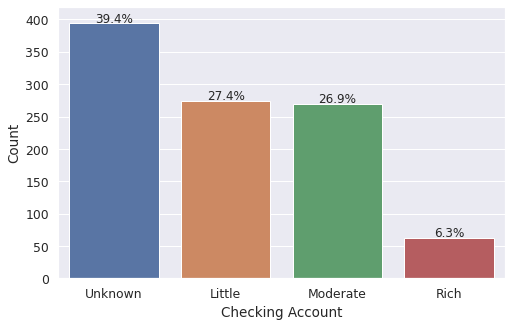

In [22]:
plt.figure(figsize = (8, 5));
cntplt = sns.countplot(data = df, x = 'Checking_account',
                       order = df.Checking_account.value_counts(ascending = False).index.tolist());
countplot_labeling(cntplt, df);
plt.xlabel('Checking Account');
plt.ylabel('Count');
plt.ylim(0, 420);

**`Loan Purpose`**

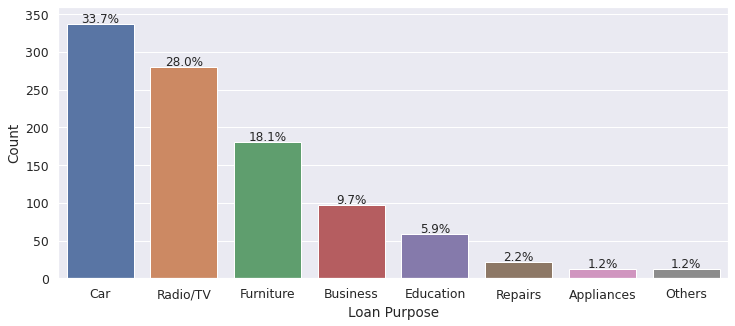

In [23]:
plt.figure(figsize = (12, 5));
cntplt = sns.countplot(data = df, x = 'Purpose',
                       order = df.Purpose.value_counts(ascending = False).index.tolist());
countplot_labeling(cntplt, df);
plt.xlabel('Loan Purpose');
plt.ylabel('Count');
plt.ylim(0, 360);

**`Risk Status`**

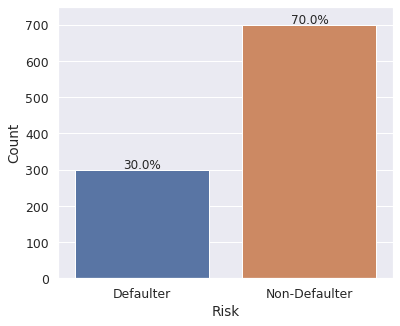

In [24]:
plt.figure(figsize = (6, 5));
cntplt = sns.countplot(data = df, x = 'Risk');
countplot_labeling(cntplt, df);
plt.ylabel('Risk Status');
plt.ylabel('Count');
plt.ylim(0, 750);

#### Observations from categorical variables:

*   The majority ***sex*** is male (69%).
*   The majority of clients are skilled for their ***job***, and only 2.2% of the debtors are unskilled and non-resident (the least frequent group).
*   71.3% of the clients own their ***housing***, 17.9% rent it and the rest have it with no charge (probably live in someone else's property). 
*   60.3% of debtors have little funds in their ***saving accounts***, while only ~ 11% of them have quite rich or rich accounts. Note that the data for 18.3% of clients isn't available.
*   27.4% of debtors have little cash in their ***checking accounts***, while the accounts of only 6.3 of them are rich. The checking account status for 39.4% is unknown.
*   Buying cars, radio/TV and furniture are the top three ***purposes*** for loans, respectively.
*   30% of debtors are at the ***risk*** of defaulting on their loans, which seems somewhat high. 



**`Age`**

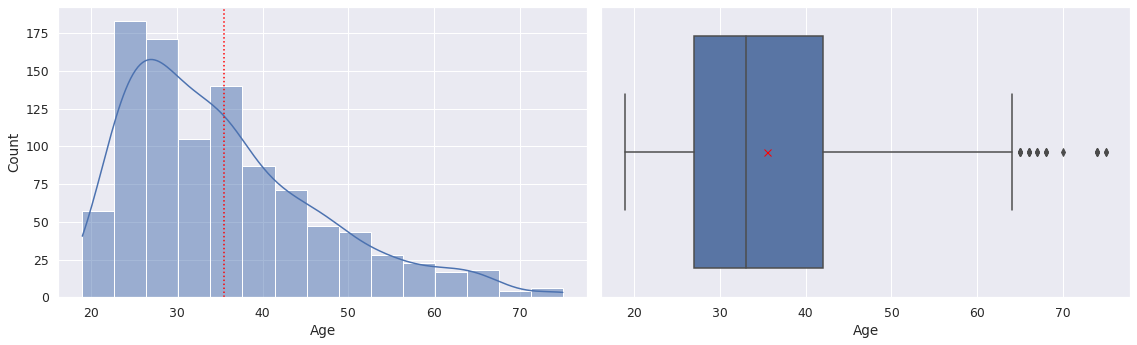

In [25]:
plt.figure(figsize = (16, 5));
# Histogram
plt.subplot(121);
sns.histplot(data = df, x = 'Age', kde = True, bins = 15);
plt.axvline(df.Age.mean(), color = 'red', linestyle = ':');
# Boxplot
plt.subplot(122);
sns.boxplot(data = df, x = 'Age', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.tight_layout();

**`Credit Amount`**

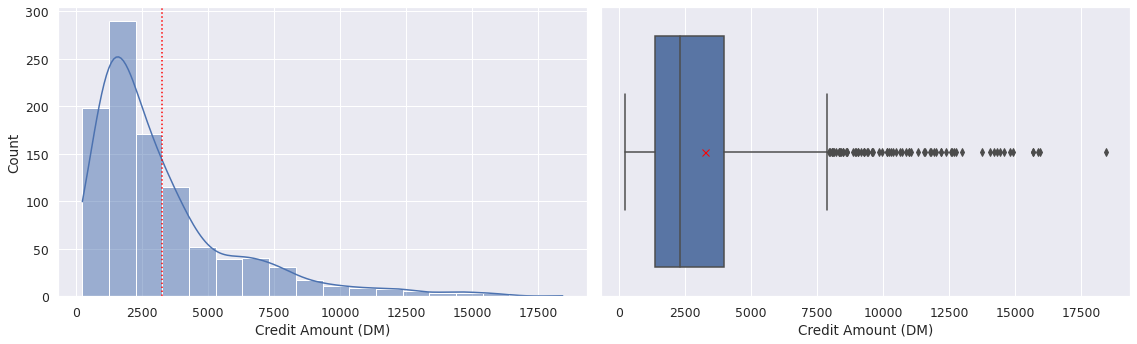

In [26]:
plt.figure(figsize = (16, 5));
# Histogram
plt.subplot(121);
sns.histplot(data = df, x = 'Credit_amount', kde = True, bins = 18);
plt.axvline(df.Credit_amount.mean(), color = 'red', linestyle = ':');
plt.xlabel('Credit Amount (DM)');
# Boxplot
plt.subplot(122);
sns.boxplot(data = df, x = 'Credit_amount', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Credit Amount (DM)');
plt.tight_layout();

**`Loan Duration`**

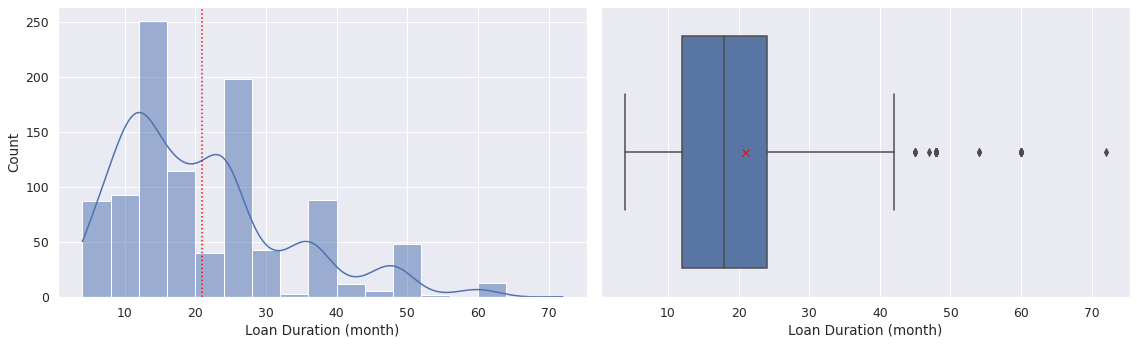

In [27]:
plt.figure(figsize = (16, 5));
# Histogram
plt.subplot(121);
sns.histplot(data = df, x = 'Duration', kde = True, binwidth = 4);
plt.axvline(df.Duration.mean(), color = 'red', linestyle = ':');
plt.xlabel('Loan Duration (month)');
# Boxplot
plt.subplot(122);
sns.boxplot(data = df, x = 'Duration', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Loan Duration (month)');
plt.tight_layout();

#### Observations from numerical variables:

*   The distribution of age is highly right-skewed, indicating that most debtors are young. The average of a loan taker is about 36.  
*   The distribution of credit is also highly skewed to the right, with several outliers (that are generally continuous and reasonable) on the right side of the main boxplot. The median and mean of credit amount are ~ 2300 DM and ~ 3300 DM, respectively.
*   The distribution of loan duration is sparse but overall right-skewed, with median and mean appearing at 18 and ~ 21, respectively. However the outliers on the right hand of the box are quite separate from the main box and each other, but due to the inherent sparsity of the variable nothing seems unexpected and illogical about them.


## Bivariate Analysis

**`Correlation Heatmap of Numerical Variables`**

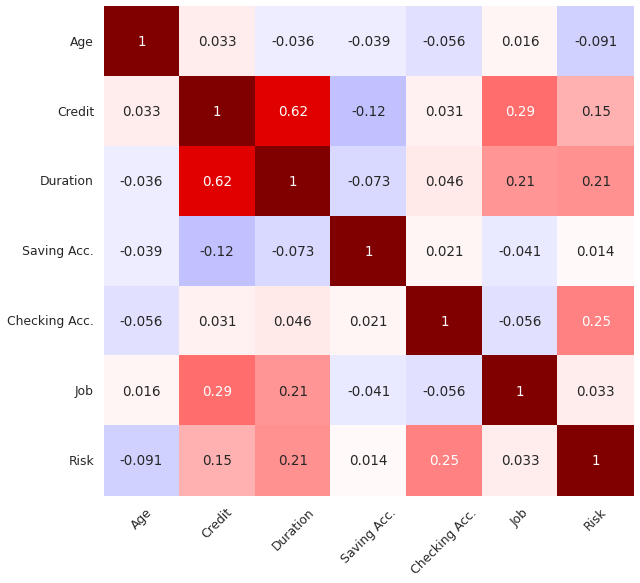

In [28]:
plt.figure(figsize = (9.5, 9));
corrmap = sns.heatmap(df.corr(), annot = True, cbar = False, cmap = 'seismic', vmin = -1, vmax = 1);
corrmap.set_xticklabels(['Age', 'Credit', 'Duration', 'Saving Acc.', 'Checking Acc.', 'Job', 'Risk'], rotation = 45);
corrmap.set_yticklabels(['Age', 'Credit', 'Duration', 'Saving Acc.', 'Checking Acc.', 'Job', 'Risk']);

#### Observations: 

*   Credit is strongly correlated with duration of loan and to a lesser degree with job skill. Highy skilled people with high credit amounts are more likely to apply for long-term loans. 
*   Credit, loan duration and the level of funds in checking account show some positive correlation with the risk of default. Other predictors show very weak correlations with the risk status. 
*   Note that the weak correlation between the size of saving account and risk might be due to the large number of unknowns for this feature.  

#### Observations:

**`Risk Status vs. Sex`**

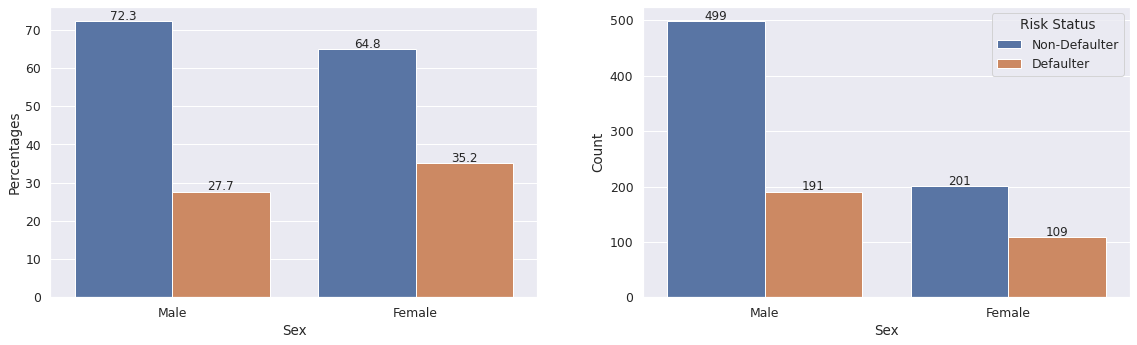

In [29]:
# Making a crosstab of sex and risk
ctab = pd.crosstab(df['Sex'], df['Risk'], normalize = 'index');
# Converting the crosstab into a dataframe
ctab_df = ctab.stack().reset_index()
# Converting fractions into percentages
ctab_df.rename(columns = {0: 'Percentages'}, inplace = True)
ctab_df['Percentages'] = ctab_df['Percentages']*100


plt.figure(figsize = (16, 5));
# Showing the results in the form of percentages
plt.subplot(121);
barplt = sns.barplot(data = ctab_df, x = 'Sex', y = 'Percentages', hue = 'Risk',
                     order = ['Male', 'Female'], hue_order = ['Non-Defaulter', 'Defaulter']);
countplot_labeling(barplt, ctab_df, perc = False);
plt.xlabel('Sex');
plt.legend(title = 'Risk Status').set_visible(False);
# Showing the results in the form of value counts
plt.subplot(122);
cntplt = sns.countplot(data = df, x = 'Sex', hue = 'Risk', 
                       order = ['Male', 'Female'], hue_order = ['Non-Defaulter', 'Defaulter']);
countplot_labeling(cntplt, df, perc = False);
plt.xlabel('Sex');
plt.ylabel('Count');
plt.legend(title = 'Risk Status');
plt.tight_layout(w_pad = 4);

#### Observations:

The percentage of defaulters is somewhat higher amoung women, but overall there isn't much of difference between two sexes.

**`Risk Status vs. Job`**

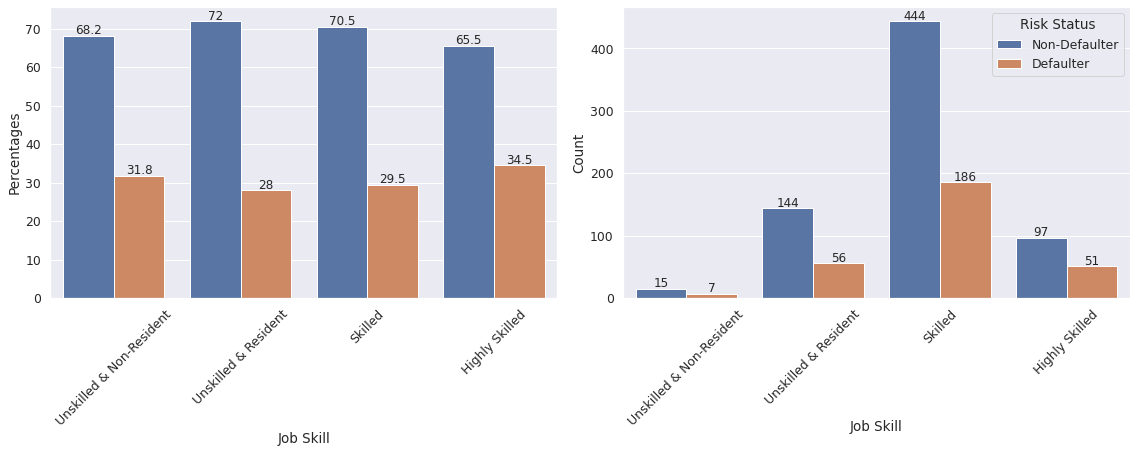

In [30]:
# Making a crosstab of job skill and risk
ctab = pd.crosstab(df['Job'], df['Risk'], normalize = 'index');
# Converting the crosstab into a dataframe
ctab_df = ctab.stack().reset_index()
# Converting fractions into percentages
ctab_df.rename(columns = {0: 'Percentages'}, inplace = True)
ctab_df['Percentages'] = ctab_df['Percentages']*100


plt.figure(figsize = (16, 6.5));
# Showing the results in the form of percentages
plt.subplot(121);
barplt = sns.barplot(data = ctab_df, x = 'Job', y = 'Percentages', hue = 'Risk',
                     order = ['Unskilled & Non-Resident', 'Unskilled & Resident', 'Skilled', 'Highly Skilled'], 
                     hue_order = ['Non-Defaulter', 'Defaulter']);
countplot_labeling(barplt, ctab_df, perc = False);
plt.xlabel('Job Skill');
plt.xticks(rotation = 45);
cntplt.xaxis.labelpad = -8;
plt.legend(title = 'Risk Status').set_visible(False);
# Showing the results in the form of value counts
plt.subplot(122);
cntplt = sns.countplot(data = df, x = 'Job', hue = 'Risk', 
                       order = ['Unskilled & Non-Resident', 'Unskilled & Resident', 'Skilled', 'Highly Skilled'],
                       hue_order = ['Non-Defaulter', 'Defaulter']);
countplot_labeling(cntplt, df, perc = False);
plt.xlabel('Job Skill');
plt.ylabel('Count');
plt.xticks(rotation = 45);
cntplt.xaxis.labelpad = -8;
plt.legend(title = 'Risk Status');
plt.tight_layout();

#### Observations:

Highly skilled clients have oddly a higher rate of default than the other groups, but overall, job skill doesn't impact the risk of default much. 

**`Risk Status vs. Housing`**

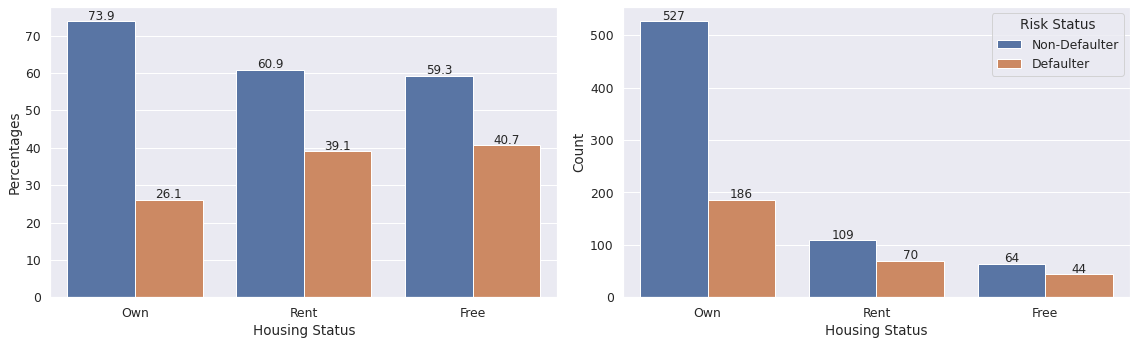

In [31]:
# Making a crosstab of housing status and risk
ctab = pd.crosstab(df['Housing'], df['Risk'], normalize = 'index');
# Converting the crosstab into a dataframe
ctab_df = ctab.stack().reset_index()
# Converting fractions into percentages
ctab_df.rename(columns = {0: 'Percentages'}, inplace = True)
ctab_df['Percentages'] = ctab_df['Percentages']*100


plt.figure(figsize = (16, 5));
# Showing the results in the form of percentages
plt.subplot(121);
barplt = sns.barplot(data = ctab_df, x = 'Housing', y = 'Percentages', hue = 'Risk',
                     order = ['Own', 'Rent', 'Free'], hue_order = ['Non-Defaulter', 'Defaulter']);
countplot_labeling(barplt, ctab_df, perc = False);
plt.xlabel('Housing Status');
plt.legend(title = 'Risk Status').set_visible(False);
# Showing the results in the form of value counts
plt.subplot(122);
cntplt = sns.countplot(data = df, x = 'Housing', hue = 'Risk', order = ['Own', 'Rent', 'Free'],
                       hue_order = ['Non-Defaulter', 'Defaulter']);
countplot_labeling(cntplt, df, perc = False);
plt.xlabel('Housing Status');
plt.ylabel('Count');
plt.legend(title = 'Risk Status');
plt.tight_layout();

#### Observations:

Clients owning their places of residence are at much lower risk of defaulting than the renters and those living free of charge (with others).

**`Risk Status vs. Saving Account`**

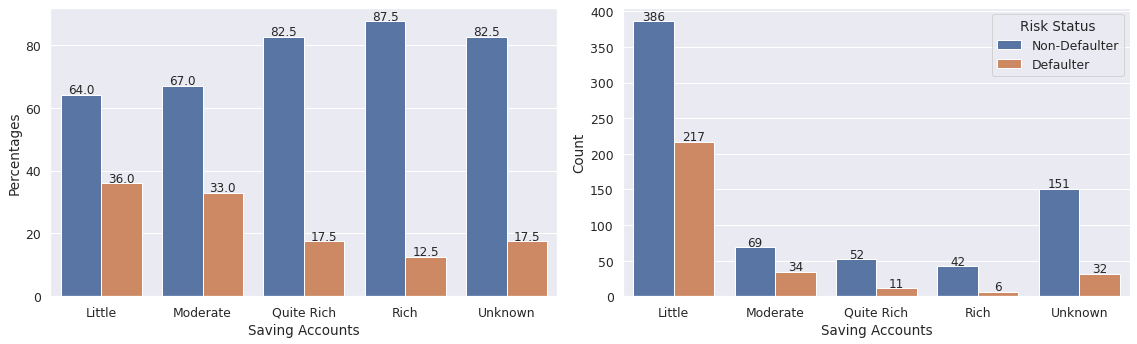

In [32]:
# Making a crosstab of saving account and risk
ctab = pd.crosstab(df['Saving_accounts'], df['Risk'], normalize = 'index');
# Converting the crosstab into a dataframe
ctab_df = ctab.stack().reset_index()
# Converting fractions into percentages
ctab_df.rename(columns = {0: 'Percentages'}, inplace = True)
ctab_df['Percentages'] = ctab_df['Percentages']*100


plt.figure(figsize = (16, 5));
# Showing the results in the form of percentages
plt.subplot(121);
barplt = sns.barplot(data = ctab_df, x = 'Saving_accounts', y = 'Percentages', hue = 'Risk',
                     order = ['Little', 'Moderate', 'Quite Rich', 'Rich', 'Unknown'], 
                     hue_order = ['Non-Defaulter', 'Defaulter']);
countplot_labeling(barplt, ctab_df, perc = False);
plt.xlabel('Saving Accounts');
plt.legend(title = 'Risk Status').set_visible(False);
# Showing the results in the form of value counts
plt.subplot(122);
cntplt = sns.countplot(data = df, x = 'Saving_accounts', hue = 'Risk', 
                       order = ['Little', 'Moderate', 'Quite Rich', 'Rich', 'Unknown'],
                       hue_order = ['Non-Defaulter', 'Defaulter']);
countplot_labeling(cntplt, df, perc = False);
plt.xlabel('Saving Accounts');
plt.ylabel('Count');
plt.legend(title = 'Risk Status');
plt.tight_layout();

#### Observations:

Expectedly, as the size of debtor's saving account grows, his chance of default constantly decreases. The weak correlation between risk status and sav ing accounts size was most likely caused by ~ 20% of unknown values of this ondependent variable. 

**`Risk Status vs. Checking Account`**

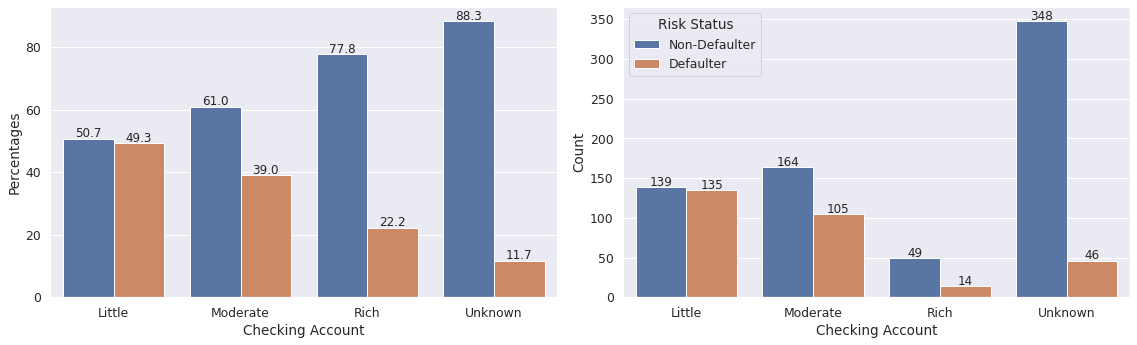

In [33]:
# Making a crosstab of checking account and risk
ctab = pd.crosstab(df['Checking_account'], df['Risk'], normalize = 'index');
# Converting the crosstab into a dataframe
ctab_df = ctab.stack().reset_index()
# Converting fractions into percentages
ctab_df.rename(columns = {0: 'Percentages'}, inplace = True)
ctab_df['Percentages'] = ctab_df['Percentages']*100


plt.figure(figsize = (16, 5));
# Showing the results in the form of percentages
plt.subplot(121);
barplt = sns.barplot(data = ctab_df, x = 'Checking_account', y = 'Percentages', hue = 'Risk',
                     order = ['Little', 'Moderate', 'Rich', 'Unknown'], 
                     hue_order = ['Non-Defaulter', 'Defaulter']);
countplot_labeling(barplt, ctab_df, perc = False);
plt.xlabel('Checking Account');
plt.legend(title = 'Risk Status').set_visible(False);
# Showing the results in the form of value counts
plt.subplot(122);
cntplt = sns.countplot(data = df, x = 'Checking_account', hue = 'Risk', 
                       order = ['Little', 'Moderate', 'Rich', 'Unknown'],
                       hue_order = ['Non-Defaulter', 'Defaulter']);
countplot_labeling(cntplt, df, perc = False);
plt.xlabel('Checking Account');
plt.ylabel('Count');
plt.legend(title = 'Risk Status');
plt.tight_layout();

#### Observations:

Decline of funds in checking account unsurprisingly increases the chance of default.

**`Risk Status vs. Loan Purpose`**

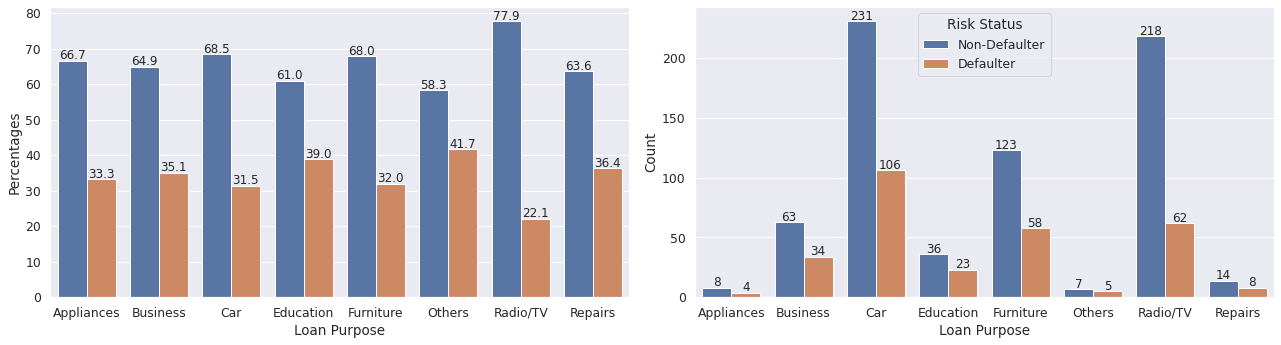

In [34]:
# Making a crosstab of loan purpose and risk
ctab = pd.crosstab(df['Purpose'], df['Risk'], normalize = 'index');
# Converting the crosstab into a dataframe
ctab_df = ctab.stack().reset_index()
# Converting fractions into percentages
ctab_df.rename(columns = {0: 'Percentages'}, inplace = True)
ctab_df['Percentages'] = ctab_df['Percentages']*100


plt.figure(figsize = (18, 5));
# Showing the results in the form of percentages
plt.subplot(121);
barplt = sns.barplot(data = ctab_df, x = 'Purpose', y = 'Percentages', hue = 'Risk', 
                     hue_order = ['Non-Defaulter', 'Defaulter']);
countplot_labeling(barplt, ctab_df, perc = False);
plt.xlabel('Loan Purpose');
plt.legend(title = 'Risk Status').set_visible(False);
# Showing the results in the form of value counts
plt.subplot(122);
cntplt = sns.countplot(data = df, x = 'Purpose', hue = 'Risk',
                       hue_order = ['Non-Defaulter', 'Defaulter']);
countplot_labeling(cntplt, df, perc = False);
plt.xlabel('Loan Purpose');
plt.ylabel('Count');
plt.legend(title = 'Risk Status', loc = 'upper center');
plt.tight_layout();

#### Observations:

*   Debtors taking loans for 'Others' and 'Education' purposes have higher default rates than other groups.
*   Clients asking for loans for the purpose of 'Radio/TV' have a noticeably lower default rate than all other classes.
*   Except these three classes, other purposes don't cause a significant variation in the default rate.

**`Risk Status vs. Age`**

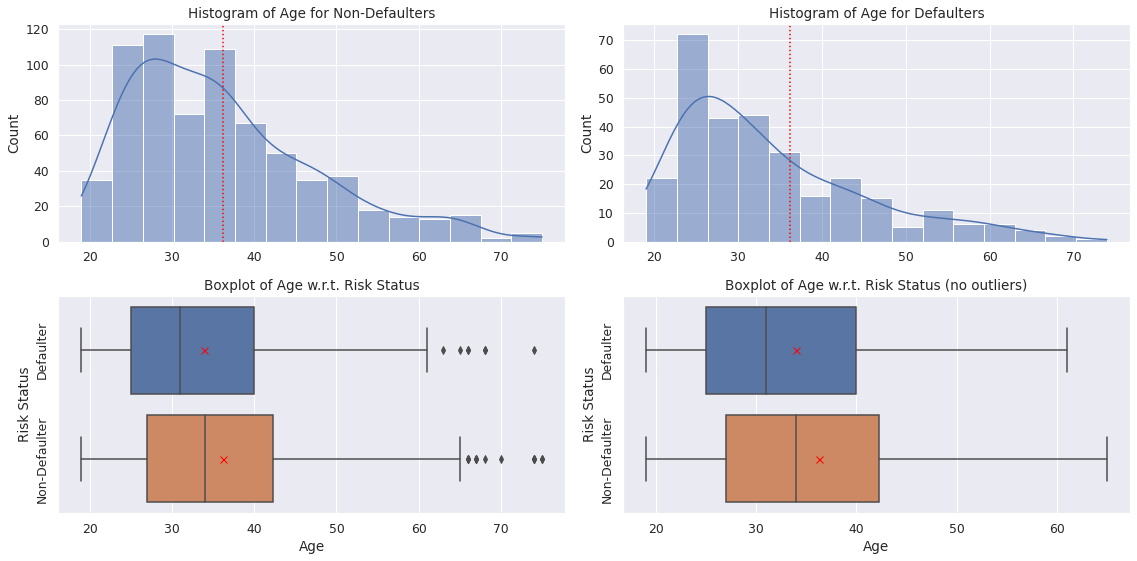

In [35]:
# Plotting the distribution of age w.r.t. risk status 
plt.figure(figsize = (16, 8));
# Histograms
plt.subplot(221);
sns.histplot(data = df.loc[df.Risk == 'Non-Defaulter'], x = 'Age', kde = True, bins = 15);
plt.axvline(df.loc[df.Risk == 'Non-Defaulter'].Age.mean(), color = 'red', linestyle = ':');
plt.title('Histogram of Age for Non-Defaulters');
plt.xlabel('');
plt.subplot(222);
sns.histplot(data = df.loc[df.Risk == 'Defaulter'], x = 'Age', kde = True, bins = 15);
plt.axvline(df.loc[df.Risk == 'Non-Defaulter'].Age.mean(), color = 'red', linestyle = ':');
plt.title('Histogram of Age for Defaulters');
plt.xlabel('');
# Boxplots
plt.subplot(223);
sns.boxplot(data = df, x = 'Age', y = 'Risk', showmeans = True,
             meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.title('Boxplot of Age w.r.t. Risk Status');
plt.xlabel('Age');
plt.ylabel('Risk Status');
plt.yticks(rotation = 90, va = 'center');
plt.subplot(224);
sns.boxplot(data = df, x = 'Age', y = 'Risk', showfliers = False, showmeans = True,
             meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.title('Boxplot of Age w.r.t. Risk Status (no outliers)');
plt.xlabel('Age');
plt.ylabel('Risk Status');
plt.yticks(rotation = 90, va = 'center');
plt.tight_layout();

#### Observations:

Younger clients are slightly more likely to default.

**`Risk Status vs. Credit Amount`**

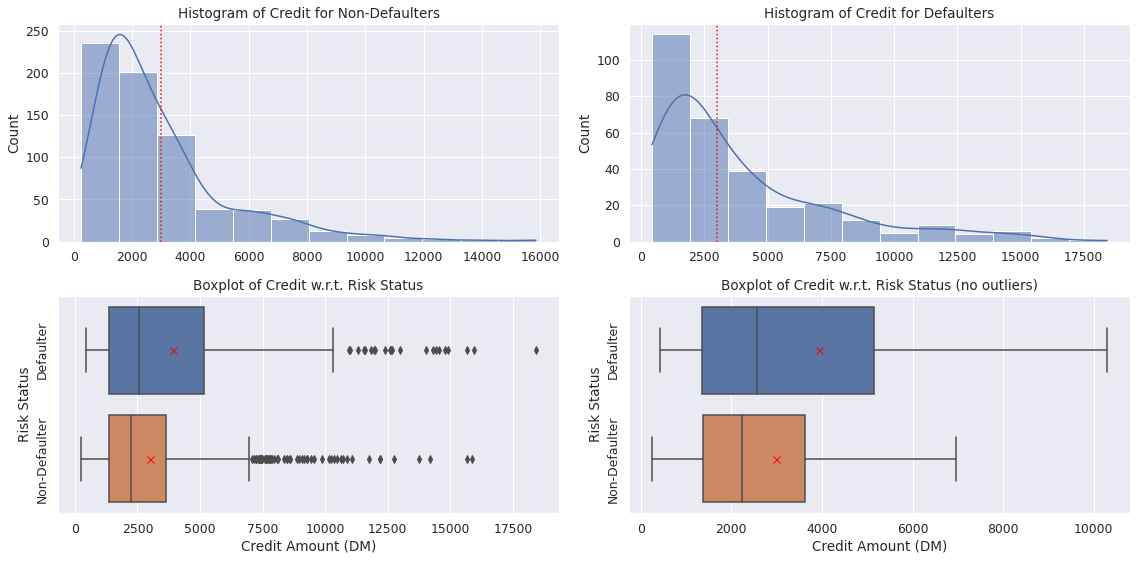

In [36]:
# Plotting the distribution of credit amount w.r.t. risk status 
plt.figure(figsize = (16, 8));
# Histograms
plt.subplot(221);
sns.histplot(data = df.loc[df.Risk == 'Non-Defaulter'], x = 'Credit_amount', kde = True, bins = 12);
plt.axvline(df.loc[df.Risk == 'Non-Defaulter'].Credit_amount.mean(), color = 'red', linestyle = ':');
plt.title('Histogram of Credit for Non-Defaulters');
plt.xlabel('');
plt.subplot(222);
sns.histplot(data = df.loc[df.Risk == 'Defaulter'], x = 'Credit_amount', kde = True, bins = 12);
plt.axvline(df.loc[df.Risk == 'Non-Defaulter'].Credit_amount.mean(), color = 'red', linestyle = ':');
plt.title('Histogram of Credit for Defaulters');
plt.xlabel('');
# Boxplots
plt.subplot(223);
sns.boxplot(data = df, x = 'Credit_amount', y = 'Risk', showmeans = True,
             meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.title('Boxplot of Credit w.r.t. Risk Status');
plt.xlabel('Credit Amount (DM)');
plt.ylabel('Risk Status');
plt.yticks(rotation = 90, va = 'center');
plt.subplot(224);
sns.boxplot(data = df, x = 'Credit_amount', y = 'Risk', showfliers = False, showmeans = True,
             meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.title('Boxplot of Credit w.r.t. Risk Status (no outliers)');
plt.xlabel('Credit Amount (DM)');
plt.ylabel('Risk Status');
plt.yticks(rotation = 90, va = 'center');
plt.tight_layout();

#### Observations:

People with higher credits (borrowed money or the upper limit on a debtor's borrowing) are more likely to default.

**`Risk Status vs. Loan Duration`**

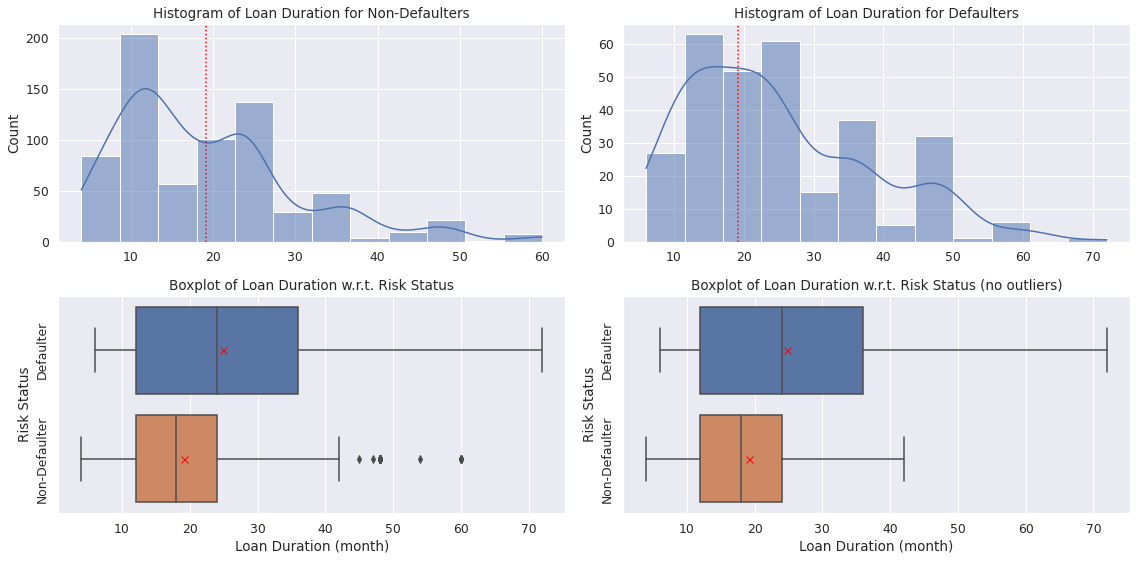

In [37]:
# Plotting the distribution of loan duration w.r.t. risk status 
plt.figure(figsize = (16, 8));
# Histograms
plt.subplot(221);
sns.histplot(data = df.loc[df.Risk == 'Non-Defaulter'], x = 'Duration', kde = True, bins = 12);
plt.axvline(df.loc[df.Risk == 'Non-Defaulter'].Duration.mean(), color = 'red', linestyle = ':');
plt.title('Histogram of Loan Duration for Non-Defaulters');
plt.xlabel('');
plt.subplot(222);
sns.histplot(data = df.loc[df.Risk == 'Defaulter'], x = 'Duration', kde = True, bins = 12);
plt.axvline(df.loc[df.Risk == 'Non-Defaulter'].Duration.mean(), color = 'red', linestyle = ':');
plt.title('Histogram of Loan Duration for Defaulters');
plt.xlabel('');
# Boxplots
plt.subplot(223);
sns.boxplot(data = df, x = 'Duration', y = 'Risk', showmeans = True,
             meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.title('Boxplot of Loan Duration w.r.t. Risk Status');
plt.xlabel('Loan Duration (month)');
plt.ylabel('Risk Status');
plt.yticks(rotation = 90, va = 'center');
plt.subplot(224);
sns.boxplot(data = df, x = 'Duration', y = 'Risk', showfliers = False, showmeans = True,
             meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.title('Boxplot of Loan Duration w.r.t. Risk Status (no outliers)');
plt.xlabel('Loan Duration (month)');
plt.ylabel('Risk Status');
plt.yticks(rotation = 90, va = 'center');
plt.tight_layout();

#### Observations:

People taking out longer-term loans are likelier to default.

**`Checking Account vs. Housing Status`**

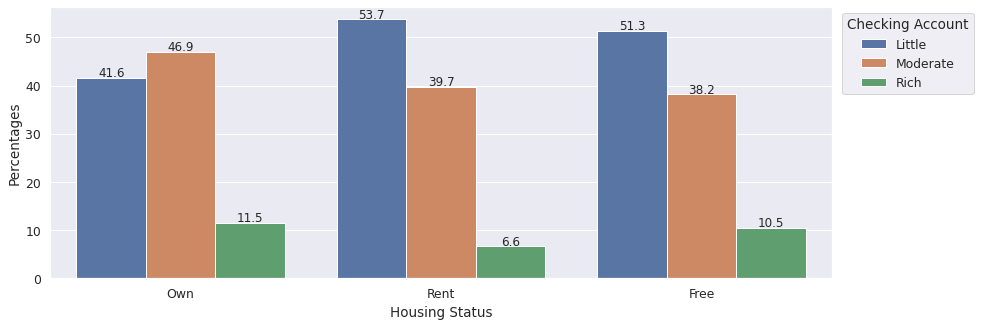

In [38]:
# Making a crosstab of housing status and checking accounts
ctab = pd.crosstab(data_orig['Housing'], data_orig['Checking account'], normalize = 'index');
# Converting the crosstab into a dataframe
ctab_df = ctab.stack().reset_index()
# Converting fractions into percentages
ctab_df.rename(columns = {0: 'Percentages'}, inplace = True)
ctab_df['Percentages'] = ctab_df['Percentages']*100
# Capitalizing the classes in the dataframe
ctab_df['Housing'].replace(['own', 'rent', 'free'], ['Own', 'Rent', 'Free'], inplace = True)
ctab_df['Checking account'].replace(['little', 'moderate', 'rich'], 
                                   ['Little', 'Moderate', 'Rich'], inplace = True)

# Showing the results in the form of percentages
plt.figure(figsize = (14, 5));
barplt = sns.barplot(data = ctab_df, x = 'Housing', y = 'Percentages', hue = 'Checking account',
                     order = ['Own', 'Rent', 'Free']);
countplot_labeling(barplt, ctab_df, perc = False);
plt.xlabel('Housing Status');
plt.legend(title = 'Checking Account', bbox_to_anchor = [1.19, 1]);

#### Observations:

*   As can be seen, the most frequent checking account class varies with housing status, making the latter a good choice for grouping while conducting missing value treatment.
*   Here, the plot has been produced for the original data, because when the removal of unknown entries helps draw a more clear conclusion.
*   A few other variables were also tried as candidates for grouping column, but none revealed a clear-cut association with the size of checking account. 

**`Saving Accounts vs. Housing Status`**

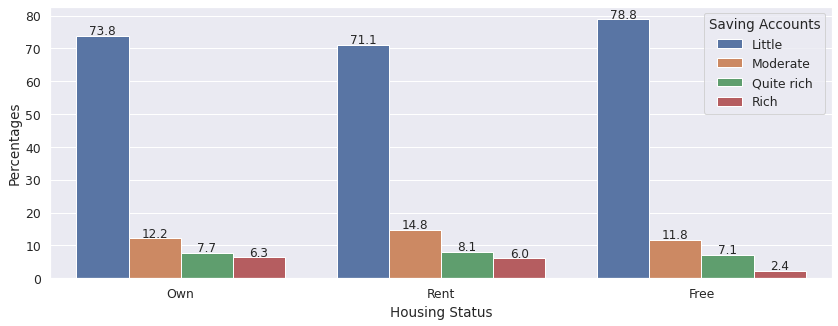

In [39]:
# Making a crosstab of housing status and saving accounts
ctab = pd.crosstab(data_orig['Housing'], data_orig['Saving accounts'], normalize = 'index');
# Converting the crosstab into a dataframe
ctab_df = ctab.stack().reset_index()
# Converting fractions into percentages
ctab_df.rename(columns = {0: 'Percentages'}, inplace = True)
ctab_df['Percentages'] = ctab_df['Percentages']*100
# Capitalizing the classes in the dataframe
ctab_df['Housing'].replace(['own', 'rent', 'free'], ['Own', 'Rent', 'Free'], inplace = True)
ctab_df['Saving accounts'].replace(['little', 'moderate', 'quite rich', 'rich'], 
                                   ['Little', 'Moderate', 'Quite rich', 'Rich'], inplace = True)

# Showing the results in the form of percentages
plt.figure(figsize = (14, 5));
barplt = sns.barplot(data = ctab_df, x = 'Housing', y = 'Percentages', hue = 'Saving accounts',
                     order = ['Own', 'Rent', 'Free']);
countplot_labeling(barplt, ctab_df, perc = False);
plt.xlabel('Housing Status');
plt.legend(title = 'Saving Accounts');

#### Observations:

*   As can be seen, the association between the size of saving accounts and housing status is fairly weak. As a result, saving accounts can't be a helpful variable while doing imputation.
*   Here, the plot has been produced for the original data, because when the removal of unknown entries helps draw a more clear conclusion.
*   Some other categorical variables were also tried as candidates for grouping column in imputation, but they also didn't reveal a strong association with the size of saving accounts. 

## Data Preprocessing

### Data Splitting

In [40]:
# Dropping categorical columns whose numerical equivalent exists
df_model = df.drop(columns = ['Job', 'Saving_accounts', 'Checking_account', 'Risk'], axis = 1)
df_model.rename(columns = {'Job_num': 'Job', 'Saving_accounts_num': 'Saving_accounts',
                           'Checking_account_num': 'Checking_account', 
                            'Risk_num': 'Risk'}, inplace = True)
# Replacing -1 in numerical columns by NaN
for col in df_model.select_dtypes(include = np.number).columns.tolist():
    df_model[col].replace(-1, np.nan, inplace = True)
df_model.head(3)

,Age,Sex,Housing,Credit_amount,Duration,Purpose,Saving_accounts,Checking_account,Job,Risk
0,67,Male,Own,1169,6,Radio/TV,NaN,1.000,3,0
1,22,Female,Own,5951,48,Radio/TV,1.000,2.000,3,1
2,49,Male,Own,2096,12,Education,1.000,NaN,2,0


In [41]:
# Splitting independent and dependent variables
X = df_model.drop(columns = 'Risk', axis = 1)
y = df_model['Risk']

# Turning categories into dummy variables
X = pd.get_dummies(X, drop_first = True)
X.head()

,Age,Credit_amount,Duration,Saving_accounts,Checking_account,Job,Sex_Male,Housing_Own,Housing_Rent,Purpose_Business,Purpose_Car,Purpose_Education,Purpose_Furniture,Purpose_Others,Purpose_Radio/TV,Purpose_Repairs
0,67,1169,6,NaN,1.000,3,1,1,0,0,0,0,0,0,1,0
1,22,5951,48,1.000,2.000,3,0,1,0,0,0,0,0,0,1,0
2,49,2096,12,1.000,NaN,2,1,1,0,0,0,1,0,0,0,0
3,45,7882,42,1.000,1.000,3,1,0,0,0,0,0,1,0,0,0
4,53,4870,24,1.000,1.000,3,1,0,0,0,1,0,0,0,0,0


In [42]:
# Splitting data into train, validation and test sets with a ratio of 70:15:15
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 1, stratify = y_temp)

# Ensuring the fractions of target variable is preserved
print('Share of target classes in the original data:\n', y.value_counts(1), sep = '', end = '\n'+'*'*50+'\n')
print('Share of target classes in the training set:\n', y_train.value_counts(1), sep = '', end = '\n'+'*'*50+'\n')
print('Share of target classes in the validation set:\n', y_valid.value_counts(1), sep = '', end = '\n'+'*'*50+'\n')
print('Share of target classes in the test set:\n', y_test.value_counts(1), sep = '')

Share of target classes in the original data:
0   0.700
1   0.300
Name: Risk, dtype: float64
**************************************************
Share of target classes in the training set:
0   0.700
1   0.300
Name: Risk, dtype: float64
**************************************************
Share of target classes in the validation set:
0   0.700
1   0.300
Name: Risk, dtype: float64
**************************************************
Share of target classes in the test set:
0   0.700
1   0.300
Name: Risk, dtype: float64


### Missing Value Treatment

*   We will use SimpleImputer() to fill out the missing values of saving accounts, with strategy being chosen as 'most_frequent', as the number of missing saving accounts isn't too large, and this variable doesn't strongly correlate with any categorical variables, hence grouping isn't an option.
*   On the other hand, the size of checking account is associated with housing status, therefore a KNN-based imputation is opted to treat the missing values of checking accounts, while housing status and checking account being passed to the imputer.

In [43]:
# Defining my own rounding function 
def my_round(x):
  '''This function is similar to np.round() except its output is integer (not float).'''
  return np.round(x).astype(int)

# Setting the imputation scheme for saving accounts
saving_imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
# Setting the imputation scheme for checking accounts
checking_imputer = KNNImputer(missing_values = np.nan, n_neighbors = 5)
# Setting a transformer to ensure the output of KNN-based imputation is an integer,
# since all values for the size of chacking account should be integer
integer_converter = FunctionTransformer(func = my_round)

# Imputing the missing values of checking account for training, validation and test sets
X_train[['Checking_account', 'Housing_Own', 'Housing_Rent']] = integer_converter.fit_transform(
                              checking_imputer.fit_transform(X_train[['Checking_account', 'Housing_Own', 'Housing_Rent']]))
X_valid[['Checking_account', 'Housing_Own', 'Housing_Rent']] = integer_converter.transform(
                              checking_imputer.transform(X_valid[['Checking_account', 'Housing_Own', 'Housing_Rent']]))
X_test[['Checking_account', 'Housing_Own', 'Housing_Rent']] = integer_converter.transform(
                              checking_imputer.transform(X_test[['Checking_account', 'Housing_Own', 'Housing_Rent']]))
# Imputing the missing values of saving accounts for training, validation and test sets
X_train = integer_converter.fit_transform(saving_imputer.fit_transform(X_train))
X_valid = integer_converter.transform(saving_imputer.transform(X_valid))
X_test  = integer_converter.transform(saving_imputer.transform(X_test))

In [44]:
# Converting training, validation and testing sets into dataframes again
X_train = pd.DataFrame(X_train, columns = X.columns.tolist())
X_valid = pd.DataFrame(X_valid, columns = X.columns.tolist())
X_test  = pd.DataFrame(X_test, columns = X.columns.tolist())

In [45]:
# Number of missing values in training, validation and testing sets
print('No. of missing values in the training set:', X_train.isnull().sum().sum())
print('No. of missing values in the validation set:', X_valid.isnull().sum().sum())
print('No. of missing values in the test set:', X_test.isnull().sum().sum())

No. of missing values in the training set: 0
No. of missing values in the validation set: 0
No. of missing values in the test set: 0


## ML-Based Model Building 

The performance measure of interest, here, is ***recall***, since accurately identifying those who won't being to pay back their debts it's far more financially beneficial for the bank.

In [46]:
# Auxiliary function for reporting the performance metrics of classification models

def model_eval(model, X_train, X_test, y_train, y_test, valid = True):
    '''This function receives a classification model as well as training and 
    validation (testing) data, and returns the evaluation metrics on both in the 
    form of a dataframe.'''

    # Reconstructing the training data
    y_recon = model.predict(X_train) 
    # Making prediction for testing (validation) data
    y_pred  = model.predict(X_test) 

    # Defining the performance dataframe
    if valid:
        model_perform = pd.DataFrame(index = ['Train', 'Validation'], 
                                     columns = ['Accuracy', 'Recall', 'Precision', 'F1', 'Specificity'])
    else:
        model_perform = pd.DataFrame(index = ['Train', 'Test'], 
                                     columns = ['Accuracy', 'Recall', 'Precision', 'F1', 'Specificity'])
    
    # Assessing the performance on training set     
    model_perform.iloc[0, :] = [accuracy_score(y_train, y_recon), recall_score(y_train, y_recon),
                                precision_score(y_train, y_recon), f1_score(y_train, y_recon),
                                recall_score(y_train, y_recon, pos_label = 0)]
    # Assessing the performance on testing (validation) set 
    model_perform.iloc[1, :] = [accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),
                                precision_score(y_test, y_pred), f1_score(y_test, y_pred),
                                recall_score(y_test, y_pred, pos_label = 0)]
    return model_perform    

In [47]:
# Auxiliary function for plotting the confusion matrix of classification models

def plot_cm(y_truth, y_pred):
    '''This function calculates the confusion matrix of the original and predicted
    data, and plots it in the form of a heatmap.'''

    # Calculating the confusion matrix
    cm = confusion_matrix(y_truth, y_pred)
    # Converting the confusion matrix into a dataframe
    cm_df = pd.DataFrame(cm, index = ['Truth -- Non-Defaulter', 'Truth -- Defaulter'],
                         columns = ['Prediction -- Non-Defaulter', 'Prediction -- Defaulter'])
    
    # Generating the labels of the heatmap
    labels = []
    for i in range(len(cm.flatten())):
      labels.append(str(cm.flatten()[i]) + '\n(' + str(round(cm.flatten()[i]/cm.flatten().sum()*100, 2)) + '%)')   
    labels = np.asarray(labels).reshape(2, 2)

    # Plotting the confusion matrix
    sns.heatmap(cm_df, fmt = '', annot = labels, cmap = 'seismic', cbar = False,
                vmin = -len(y_truth), vmax = len(y_truth))
    plt.xlabel('Prediction');
    plt.ylabel('Truth')

### Baseline (Untuned) Models

**`Logistic Regression`**

In [48]:
# Building the baseline model
lgc0 = LogisticRegression(solver = 'liblinear', max_iter = 1000, random_state = 1)
lgc0 = lgc0.fit(X_train, y_train)

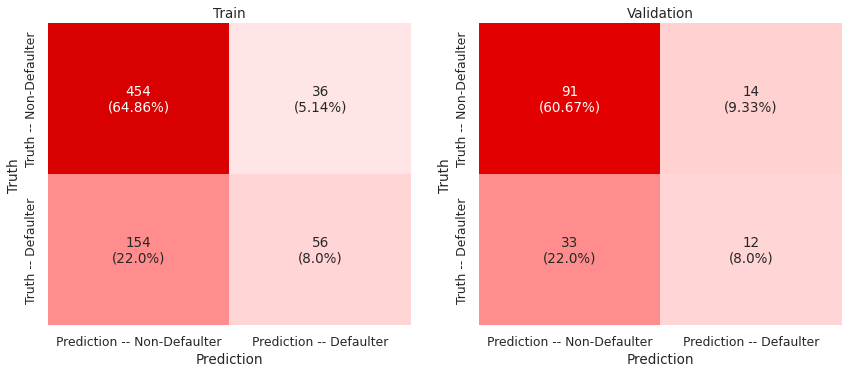

In [49]:
# Reconstructing the training data
y_recon = lgc0.predict(X_train)
# Making prediction on validation set
y_pred  = lgc0.predict(X_valid)

# Plotting the confusion matrices
plt.figure(figsize = (12, 5.4));
plt.subplot(121);
plot_cm(y_train, y_recon);
plt.title('Train');
plt.subplot(122);
plot_cm(y_valid, y_pred);
plt.title('Validation');
plt.tight_layout(w_pad = 2);

In [50]:
# Reporting the evaluation metrics on train and validation sets
lgc0_perform = model_eval(lgc0, X_train, X_valid, y_train, y_valid)
lgc0_perform

,Accuracy,Recall,Precision,F1,Specificity
Train,0.729,0.267,0.609,0.371,0.927
Validation,0.687,0.267,0.462,0.338,0.867


In [51]:
# Finding the region of uncertainty for the model performance

# Dividing training data into 10 random folds
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)

# cross-validation results
cv_results = cross_val_score(lgc0, X_train, y_train, scoring = 'recall', cv = kfold)
cv_mean = cv_results.mean()
cv_std  = cv_results.std() 

# Reporting the model's average performance and confidence interval
print('The average recall score of the model is {} and, with 95% certainty, its recall score resides between {} and {}.'
      .format(round(cv_mean, 3), round(cv_mean-2*cv_std, 3), round(cv_mean+2*cv_std, 3))) 

The average recall score of the model is 0.233 and, with 95% certainty, its recall score resides between 0.077 and 0.39.


**`Random Forest Classifier`**

In [52]:
# Building the baseline model
rfc0 = RandomForestClassifier(random_state = 1)
rfc0 = rfc0.fit(X_train, y_train)

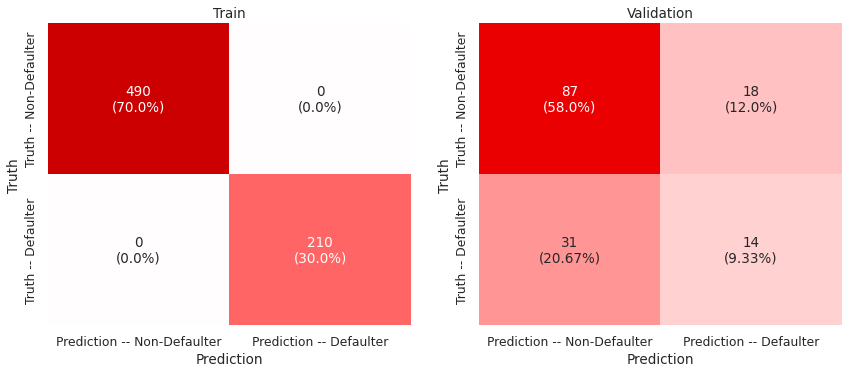

In [53]:
# Reconstructing the training data
y_recon = rfc0.predict(X_train)
# Making prediction on validation set
y_pred  = rfc0.predict(X_valid)

# Plotting the confusion matrices
plt.figure(figsize = (12, 5.4));
plt.subplot(121);
plot_cm(y_train, y_recon);
plt.title('Train');
plt.subplot(122);
plot_cm(y_valid, y_pred);
plt.title('Validation');
plt.tight_layout(w_pad = 2);

In [54]:
# Reporting the evaluation metrics on train and validation sets
rfc0_perform = model_eval(rfc0, X_train, X_valid, y_train, y_valid)
rfc0_perform

,Accuracy,Recall,Precision,F1,Specificity
Train,1.000,1.000,1.000,1.000,1.000
Validation,0.673,0.311,0.438,0.364,0.829


In [55]:
# Finding the region of uncertainty for the model performance

# Dividing training data into 10 random folds
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)

# cross-validation results
cv_results = cross_val_score(rfc0, X_train, y_train, scoring = 'recall', cv = kfold)
cv_mean = cv_results.mean()
cv_std  = cv_results.std() 

# Reporting the model's average performance and confidence interval
print('The average recall score of the model is {} and, with 95% certainty, its recall score resides between {} and {}.'
      .format(round(cv_mean, 3), round(cv_mean-2*cv_std, 3), round(cv_mean+2*cv_std, 3))) 

The average recall score of the model is 0.314 and, with 95% certainty, its recall score resides between 0.166 and 0.463.


**`Adaptive Boosting Classifier`**

In [56]:
# Building the baseline model
abc0 = AdaBoostClassifier(random_state = 1)
abc0 = abc0.fit(X_train, y_train)

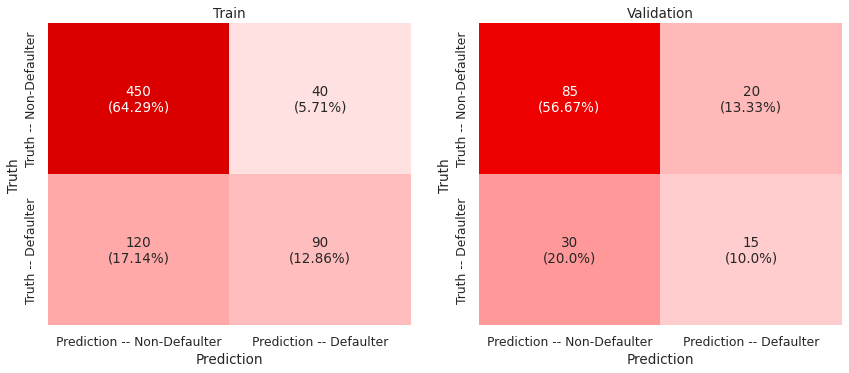

In [57]:
# Reconstructing the training data
y_recon = abc0.predict(X_train)
# Making prediction on validation set
y_pred  = abc0.predict(X_valid)

# Plotting the confusion matrices
plt.figure(figsize = (12, 5.4));
plt.subplot(121);
plot_cm(y_train, y_recon);
plt.title('Train');
plt.subplot(122);
plot_cm(y_valid, y_pred);
plt.title('Validation');
plt.tight_layout(w_pad = 2);

In [58]:
# Reporting the evaluation metrics on train and validation sets
abc0_perform = model_eval(abc0, X_train, X_valid, y_train, y_valid)
abc0_perform

,Accuracy,Recall,Precision,F1,Specificity
Train,0.771,0.429,0.692,0.529,0.918
Validation,0.667,0.333,0.429,0.375,0.810


In [59]:
# Finding the region of uncertainty for the model performance

# Dividing training data into 10 random folds
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)

# cross-validation results
cv_results = cross_val_score(abc0, X_train, y_train, scoring = 'recall', cv = kfold)
cv_mean = cv_results.mean()
cv_std  = cv_results.std() 

# Reporting the model's average performance and confidence interval
print('The average recall score of the model is {} and, with 95% certainty, its recall score resides between {} and {}.'
      .format(round(cv_mean, 3), round(cv_mean-2*cv_std, 3), round(cv_mean+2*cv_std, 3))) 

The average recall score of the model is 0.3 and, with 95% certainty, its recall score resides between 0.07 and 0.53.


**`Gradient Boosting Classifier`**

In [60]:
# Building the baseline model
gbc0 = GradientBoostingClassifier(random_state = 1)
gbc0 = gbc0.fit(X_train, y_train)

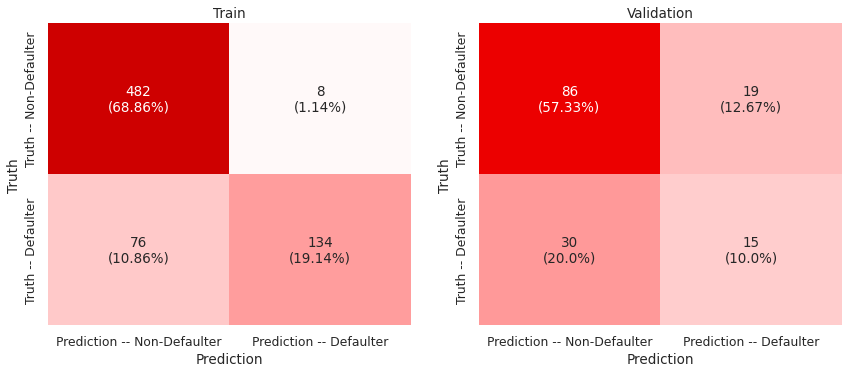

In [61]:
# Reconstructing the training data
y_recon = gbc0.predict(X_train)
# Making prediction on validation set
y_pred  = gbc0.predict(X_valid)

# Plotting the confusion matrices
plt.figure(figsize = (12, 5.4));
plt.subplot(121);
plot_cm(y_train, y_recon);
plt.title('Train');
plt.subplot(122);
plot_cm(y_valid, y_pred);
plt.title('Validation');
plt.tight_layout(w_pad = 2);

In [62]:
# Reporting the evaluation metrics on train and validation sets
gbc0_perform = model_eval(gbc0, X_train, X_valid, y_train, y_valid)
gbc0_perform

,Accuracy,Recall,Precision,F1,Specificity
Train,0.880,0.638,0.944,0.761,0.984
Validation,0.673,0.333,0.441,0.380,0.819


In [63]:
# Finding the region of uncertainty for the model performance

# Dividing training data into 10 random folds
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)

# cross-validation results
cv_results = cross_val_score(gbc0, X_train, y_train, scoring = 'recall', cv = kfold)
cv_mean = cv_results.mean()
cv_std  = cv_results.std() 

# Reporting the model's average performance and confidence interval
print('The average recall score of the model is {} and, with 95% certainty, its recall score resides between {} and {}.'
      .format(round(cv_mean, 3), round(cv_mean-2*cv_std, 3), round(cv_mean+2*cv_std, 3))) 

The average recall score of the model is 0.348 and, with 95% certainty, its recall score resides between 0.182 and 0.513.


**`XGBoost Classifier`**

In [64]:
# Building the baseline model
xgbc0 = XGBClassifier(random_state = 1, eval_metric = 'logloss')
xgbc0 = xgbc0.fit(X_train, y_train)

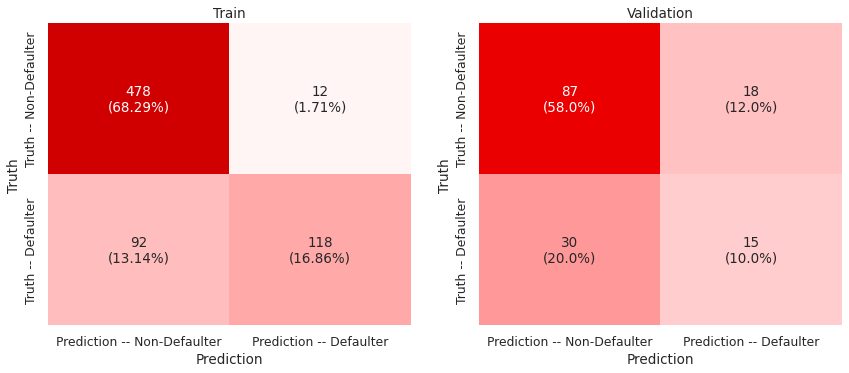

In [65]:
# Reconstructing the training data
y_recon = xgbc0.predict(X_train)
# Making prediction on validation set
y_pred  = xgbc0.predict(X_valid)

# Plotting the confusion matrices
plt.figure(figsize = (12, 5.4));
plt.subplot(121);
plot_cm(y_train, y_recon);
plt.title('Train');
plt.subplot(122);
plot_cm(y_valid, y_pred);
plt.title('Validation');
plt.tight_layout(w_pad = 2);

In [66]:
# Reporting the evaluation metrics on train and validation sets
xgbc0_perform = model_eval(xgbc0, X_train, X_valid, y_train, y_valid)
xgbc0_perform

,Accuracy,Recall,Precision,F1,Specificity
Train,0.851,0.562,0.908,0.694,0.976
Validation,0.680,0.333,0.455,0.385,0.829


In [67]:
# Finding the region of uncertainty for the model performance

# Dividing training data into 10 random folds
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)

# cross-validation results
cv_results = cross_val_score(xgbc0, X_train, y_train, scoring = 'recall', cv = kfold)
cv_mean = cv_results.mean()
cv_std  = cv_results.std() 

# Reporting the model's average performance and confidence interval
print('The average recall score of the model is {} and, with 95% certainty, its recall score resides between {} and {}.'
      .format(round(cv_mean, 3), round(cv_mean-2*cv_std, 3), round(cv_mean+2*cv_std, 3))) 

The average recall score of the model is 0.362 and, with 95% certainty, its recall score resides between 0.24 and 0.484.


**`Comparison`**

In [68]:
# Comparison of all baseline models on validation set
baseline_compare = pd.concat([lgc0_perform, rfc0_perform, abc0_perform, 
                              gbc0_perform, xgbc0_perform])[1::2]
baseline_compare.index = ['Logistic Regression', 'Random Forest', 'AdaBoost',
                          'Gradient Boosting', 'XGBoost']
baseline_compare

,Accuracy,Recall,Precision,F1,Specificity
Logistic Regression,0.687,0.267,0.462,0.338,0.867
Random Forest,0.673,0.311,0.438,0.364,0.829
AdaBoost,0.667,0.333,0.429,0.375,0.810
Gradient Boosting,0.673,0.333,0.441,0.380,0.819
XGBoost,0.680,0.333,0.455,0.385,0.829


#### Observations:

*   All models clearly suffer from overfitting, logistic regression and adaptive boosting classifiers, less than the others.
*   The performance confidence interval is quite large for all models, which is another indication of overfitting.
*   All boosting methods (adaptive, gradient and extreme gradient boosting classifiers) have similar performances and rank above the other two classifiers.

### Oversampling 

In [69]:
# Setting the oversampling strategy
oversampling_scheme = SMOTE(sampling_strategy = 1, k_neighbors = 5, random_state = 1)
# Oversampling the training data
X_train_over, y_train_over = oversampling_scheme.fit_resample(X_train, y_train)

# Comparing the original and oversampled training sets
print('The counts of target classes in the original training data:\n', 
      y_train.value_counts(), sep = '', end = '\n' + '**'*35 + '\n')
print('The counts of target classes in the oversampled training data:\n', 
      y_train_over.value_counts(), sep = '', end = '\n' + '**'*35 + '\n')
print('The fraction of target classes in in the original training data:\n', 
      y_train.value_counts(1), sep = '', end = '\n' + '**'*35 + '\n')
print('The fraction of target classes in the oversampled training data:\n', 
      y_train_over.value_counts(1), sep = '', end = '\n' + '**'*35 + '\n')
print('The size of training data before oversampling training data:', X_train.shape)
print('The size of training data after oversampling training data:', X_train_over.shape)

The counts of target classes in the original training data:
0    490
1    210
Name: Risk, dtype: int64
**********************************************************************
The counts of target classes in the oversampled training data:
0    490
1    490
Name: Risk, dtype: int64
**********************************************************************
The fraction of target classes in in the original training data:
0   0.700
1   0.300
Name: Risk, dtype: float64
**********************************************************************
The fraction of target classes in the oversampled training data:
0   0.500
1   0.500
Name: Risk, dtype: float64
**********************************************************************
The size of training data before oversampling training data: (700, 16)
The size of training data after oversampling training data: (980, 16)


**`Logistic Regression`**

In [70]:
# Building the model on oversampled data
lgc_over = LogisticRegression(solver = 'liblinear', max_iter = 1000, random_state = 1)
lgc_over = lgc_over.fit(X_train_over, y_train_over)

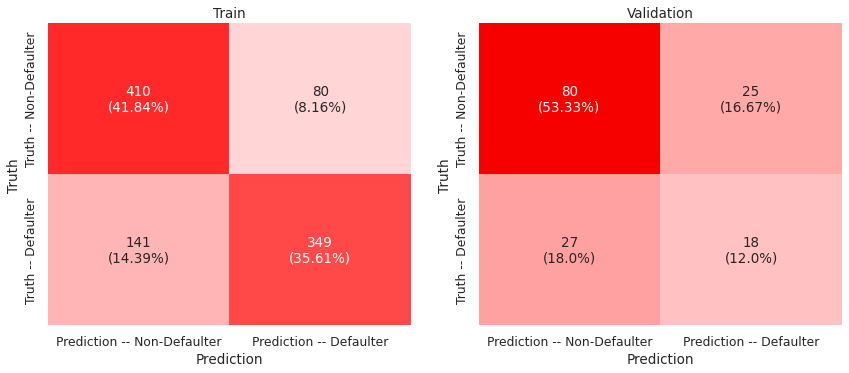

In [71]:
# Reconstructing the training data
y_recon = lgc_over.predict(X_train_over)
# Making prediction on validation set
y_pred  = lgc_over.predict(X_valid)

# Plotting the confusion matrices
plt.figure(figsize = (12, 5.4));
plt.subplot(121);
plot_cm(y_train_over, y_recon);
plt.title('Train');
plt.subplot(122);
plot_cm(y_valid, y_pred);
plt.title('Validation');
plt.tight_layout(w_pad = 2);

In [72]:
# Reporting the evaluation metrics on train and validation sets
lgc_over_perform = model_eval(lgc_over, X_train_over, X_valid, y_train_over, y_valid)
lgc_over_perform

,Accuracy,Recall,Precision,F1,Specificity
Train,0.774,0.712,0.814,0.760,0.837
Validation,0.653,0.400,0.419,0.409,0.762


In [73]:
# Finding the region of uncertainty for the model performance

# Dividing training data into 10 random folds
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)

# cross-validation results
cv_results = cross_val_score(lgc_over, X_train_over, y_train_over, scoring = 'recall', cv = kfold)
cv_mean = cv_results.mean()
cv_std  = cv_results.std() 

# Reporting the model's average performance and confidence interval
print('The average recall score of the model is {} and, with 95% certainty, its recall score resides between {} and {}.'
      .format(round(cv_mean, 3), round(cv_mean-2*cv_std, 3), round(cv_mean+2*cv_std, 3))) 

The average recall score of the model is 0.688 and, with 95% certainty, its recall score resides between 0.602 and 0.773.


**`Random Forest Classifier`**

In [74]:
# Building the model on oversampled data
rfc_over = RandomForestClassifier(random_state = 1)
rfc_over = rfc_over.fit(X_train_over, y_train_over)

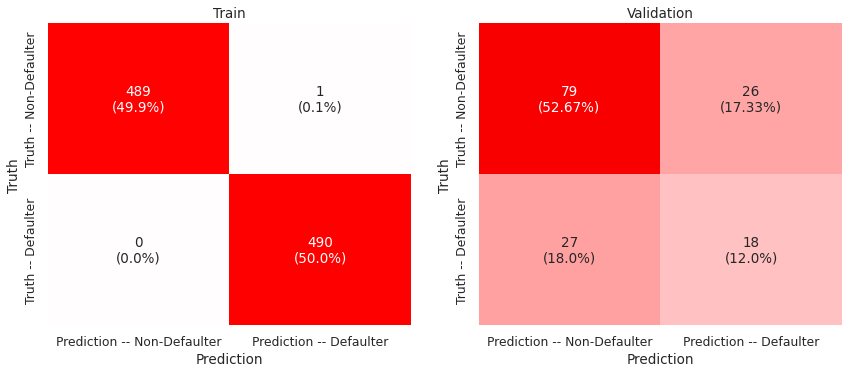

In [75]:
# Reconstructing the training data
y_recon = rfc_over.predict(X_train_over)
# Making prediction on validation set
y_pred  = rfc_over.predict(X_valid)

# Plotting the confusion matrices
plt.figure(figsize = (12, 5.4));
plt.subplot(121);
plot_cm(y_train_over, y_recon);
plt.title('Train');
plt.subplot(122);
plot_cm(y_valid, y_pred);
plt.title('Validation');
plt.tight_layout(w_pad = 2);

In [76]:
# Reporting the evaluation metrics on train and validation sets
rfc_over_perform = model_eval(rfc_over, X_train_over, X_valid, y_train_over, y_valid)
rfc_over_perform

,Accuracy,Recall,Precision,F1,Specificity
Train,0.999,1.000,0.998,0.999,0.998
Validation,0.647,0.400,0.409,0.404,0.752


In [77]:
# Finding the region of uncertainty for the model performance

# Dividing training data into 10 random folds
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)

# cross-validation results
cv_results = cross_val_score(rfc_over, X_train_over, y_train_over, scoring = 'recall', cv = kfold)
cv_mean = cv_results.mean()
cv_std  = cv_results.std() 

# Reporting the model's average performance and confidence interval
print('The average recall score of the model is {} and, with 95% certainty, its recall score resides between {} and {}.'
      .format(round(cv_mean, 3), round(cv_mean-2*cv_std, 3), round(cv_mean+2*cv_std, 3))) 

The average recall score of the model is 0.761 and, with 95% certainty, its recall score resides between 0.647 and 0.875.


**`Adaptive Boosting Classifier`**

In [78]:
# Building the model on oversampled data
abc_over = AdaBoostClassifier(random_state = 1)
abc_over = abc_over.fit(X_train_over, y_train_over)

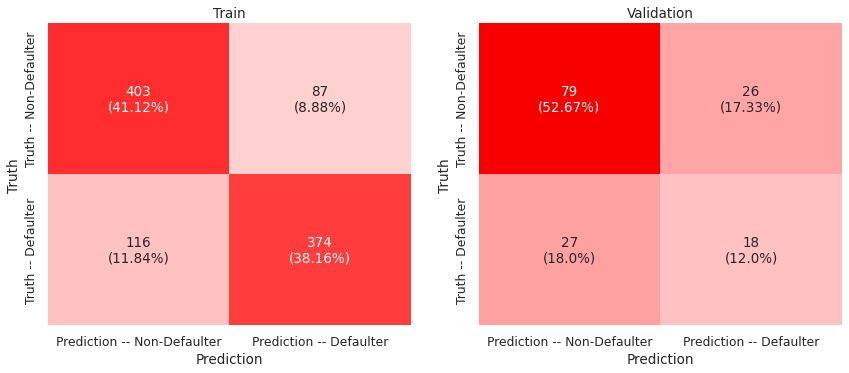

In [79]:
# Reconstructing the training data
y_recon = abc_over.predict(X_train_over)
# Making prediction on validation set
y_pred  = abc_over.predict(X_valid)

# Plotting the confusion matrices
plt.figure(figsize = (12, 5.4));
plt.subplot(121);
plot_cm(y_train_over, y_recon);
plt.title('Train');
plt.subplot(122);
plot_cm(y_valid, y_pred);
plt.title('Validation');
plt.tight_layout(w_pad = 2);

In [80]:
# Reporting the evaluation metrics on train and validation sets
abc_over_perform = model_eval(abc_over, X_train_over, X_valid, y_train_over, y_valid)
abc_over_perform

,Accuracy,Recall,Precision,F1,Specificity
Train,0.793,0.763,0.811,0.787,0.822
Validation,0.647,0.400,0.409,0.404,0.752


In [81]:
# Finding the region of uncertainty for the model performance

# Dividing training data into 10 random folds
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)

# cross-validation results
cv_results = cross_val_score(abc_over, X_train_over, y_train_over, scoring = 'recall', cv = kfold)
cv_mean = cv_results.mean()
cv_std  = cv_results.std() 

# Reporting the model's average performance and confidence interval
print('The average recall score of the model is {} and, with 95% certainty, its recall score resides between {} and {}.'
      .format(round(cv_mean, 3), round(cv_mean-2*cv_std, 3), round(cv_mean+2*cv_std, 3))) 

The average recall score of the model is 0.743 and, with 95% certainty, its recall score resides between 0.653 and 0.833.


**`Gradient Boosting Classifier`**

In [82]:
# Building the model on oversampled data
gbc_over = GradientBoostingClassifier(random_state = 1)
gbc_over = gbc_over.fit(X_train_over, y_train_over)

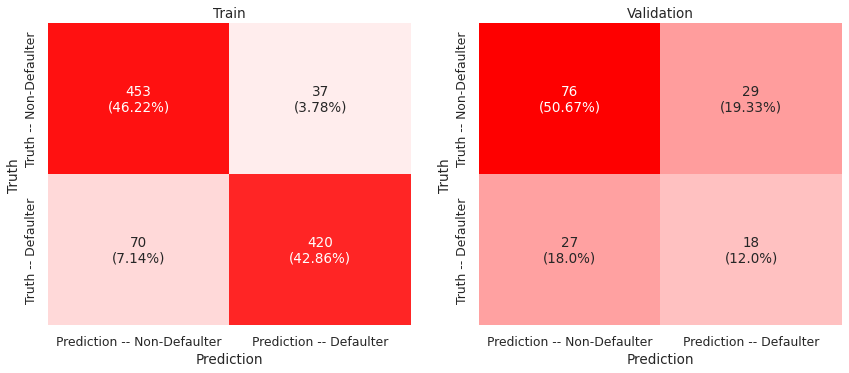

In [83]:
# Reconstructing the training data
y_recon = gbc_over.predict(X_train_over)
# Making prediction on validation set
y_pred  = gbc_over.predict(X_valid)

# Plotting the confusion matrices
plt.figure(figsize = (12, 5.4));
plt.subplot(121);
plot_cm(y_train_over, y_recon);
plt.title('Train');
plt.subplot(122);
plot_cm(y_valid, y_pred);
plt.title('Validation');
plt.tight_layout(w_pad = 2);

In [84]:
# Reporting the evaluation metrics on train and validation sets
gbc_over_perform = model_eval(gbc_over, X_train_over, X_valid, y_train_over, y_valid)
gbc_over_perform

,Accuracy,Recall,Precision,F1,Specificity
Train,0.891,0.857,0.919,0.887,0.924
Validation,0.627,0.400,0.383,0.391,0.724


In [85]:
# Finding the region of uncertainty for the model performance

# Dividing training data into 10 random folds
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)

# cross-validation results
cv_results = cross_val_score(gbc_over, X_train_over, y_train_over, scoring = 'recall', cv = kfold)
cv_mean = cv_results.mean()
cv_std  = cv_results.std() 

# Reporting the model's average performance and confidence interval
print('The average recall score of the model is {} and, with 95% certainty, its recall score resides between {} and {}.'
      .format(round(cv_mean, 3), round(cv_mean-2*cv_std, 3), round(cv_mean+2*cv_std, 3))) 

The average recall score of the model is 0.767 and, with 95% certainty, its recall score resides between 0.685 and 0.849.


**`XGBoost Classifier`**

In [86]:
# Building the model on oversampled data
xgbc_over = XGBClassifier(random_state = 1, eval_metric = 'logloss')
xgbc_over = xgbc_over.fit(X_train_over, y_train_over)

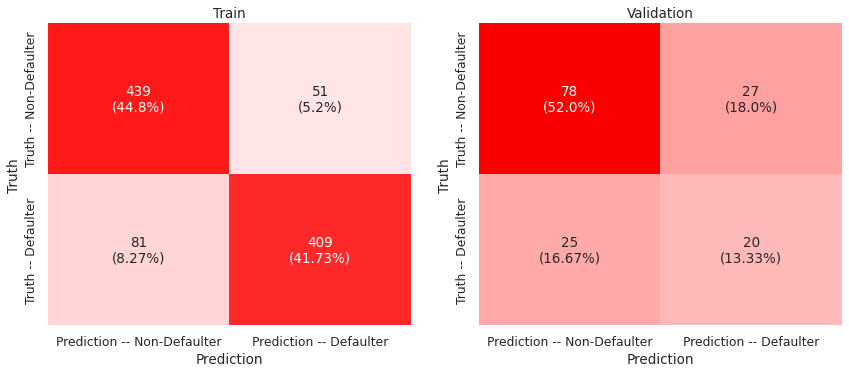

In [87]:
# Reconstructing the training data
y_recon = xgbc_over.predict(X_train_over)
# Making prediction on validation set
y_pred  = xgbc_over.predict(X_valid)

# Plotting the confusion matrices
plt.figure(figsize = (12, 5.4));
plt.subplot(121);
plot_cm(y_train_over, y_recon);
plt.title('Train');
plt.subplot(122);
plot_cm(y_valid, y_pred);
plt.title('Validation');
plt.tight_layout(w_pad = 2);

In [88]:
# Reporting the evaluation metrics on train and validation sets
xgbc_over_perform = model_eval(xgbc_over, X_train_over, X_valid, y_train_over, y_valid)
xgbc_over_perform

,Accuracy,Recall,Precision,F1,Specificity
Train,0.865,0.835,0.889,0.861,0.896
Validation,0.653,0.444,0.426,0.435,0.743


In [89]:
# Finding the region of uncertainty for the model performance

# Dividing training data into 10 random folds
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)

# cross-validation results
cv_results = cross_val_score(xgbc_over, X_train_over, y_train_over, scoring = 'recall', cv = kfold)
cv_mean = cv_results.mean()
cv_std  = cv_results.std() 

# Reporting the model's average performance and confidence interval
print('The average recall score of the model is {} and, with 95% certainty, its recall score resides between {} and {}.'
      .format(round(cv_mean, 3), round(cv_mean-2*cv_std, 3), round(cv_mean+2*cv_std, 3))) 

The average recall score of the model is 0.757 and, with 95% certainty, its recall score resides between 0.688 and 0.827.


**`Comparison`**

In [90]:
# Comparison of all oversampled models on validation set
oversampled_compare = pd.concat([lgc_over_perform, rfc_over_perform, abc_over_perform, 
                              gbc_over_perform, xgbc_over_perform])[1::2]
oversampled_compare.index = ['Logistic Regression', 'Random Forest', 'AdaBoost',
                          'Gradient Boosting', 'XGBoost']
oversampled_compare

,Accuracy,Recall,Precision,F1,Specificity
Logistic Regression,0.653,0.400,0.419,0.409,0.762
Random Forest,0.647,0.400,0.409,0.404,0.752
AdaBoost,0.647,0.400,0.409,0.404,0.752
Gradient Boosting,0.627,0.400,0.383,0.391,0.724
XGBoost,0.653,0.444,0.426,0.435,0.743


#### Observations: 

However oversampling has boosted the (recall-based) performance of all models, but all models still perform poorly on validation set, and suffer from overfitting significantly.

### Undersampling

In [91]:
# Setting the undersampling strategy
undersampling_scheme = RandomUnderSampler(sampling_strategy = 1, random_state = 1)
# Oversampling the training data
X_train_under, y_train_under = undersampling_scheme.fit_resample(X_train, y_train)

# Comparing the original and oversampled training sets
print('The counts of target classes in the original training data:\n', 
      y_train.value_counts(), sep = '', end = '\n' + '**'*35 + '\n')
print('The counts of target classes in the undersampled training data:\n', 
      y_train_under.value_counts(), sep = '', end = '\n' + '**'*35 + '\n')
print('The fraction of target classes in in the original training data:\n', 
      y_train.value_counts(1), sep = '', end = '\n' + '**'*35 + '\n')
print('The fraction of target classes in the undersampled training data:\n', 
      y_train_under.value_counts(1), sep = '', end = '\n' + '**'*35 + '\n')
print('The size of training data before undersampling training data:', X_train.shape)
print('The size of training data after undersampling training data:', X_train_under.shape)

The counts of target classes in the original training data:
0    490
1    210
Name: Risk, dtype: int64
**********************************************************************
The counts of target classes in the undersampled training data:
0    210
1    210
Name: Risk, dtype: int64
**********************************************************************
The fraction of target classes in in the original training data:
0   0.700
1   0.300
Name: Risk, dtype: float64
**********************************************************************
The fraction of target classes in the undersampled training data:
0   0.500
1   0.500
Name: Risk, dtype: float64
**********************************************************************
The size of training data before undersampling training data: (700, 16)
The size of training data after undersampling training data: (420, 16)


**`Logistic Regression`**

In [92]:
# Building the model on undersampled data
lgc_under = LogisticRegression(solver = 'liblinear', max_iter = 1000, random_state = 1)
lgc_under = lgc_under.fit(X_train_under, y_train_under)

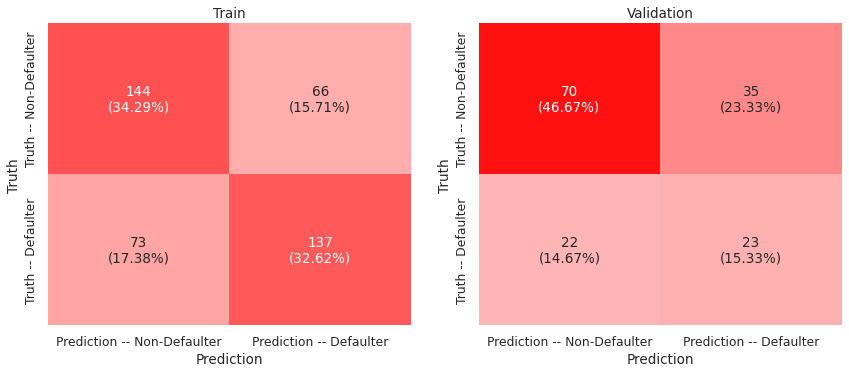

In [93]:
# Reconstructing the training data
y_recon = lgc_under.predict(X_train_under)
# Making prediction on validation set
y_pred  = lgc_under.predict(X_valid)

# Plotting the confusion matrices
plt.figure(figsize = (12, 5.4));
plt.subplot(121);
plot_cm(y_train_under, y_recon);
plt.title('Train');
plt.subplot(122);
plot_cm(y_valid, y_pred);
plt.title('Validation');
plt.tight_layout(w_pad = 2);

In [94]:
# Reporting the evaluation metrics on train and validation sets
lgc_under_perform = model_eval(lgc_under, X_train_under, X_valid, y_train_under, y_valid)
lgc_under_perform

,Accuracy,Recall,Precision,F1,Specificity
Train,0.669,0.652,0.675,0.663,0.686
Validation,0.620,0.511,0.397,0.447,0.667


In [95]:
# Finding the region of uncertainty for the model performance

# Dividing training data into 10 random folds
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)

# cross-validation results
cv_results = cross_val_score(lgc_under, X_train_under, y_train_under, scoring = 'recall', cv = kfold)
cv_mean = cv_results.mean()
cv_std  = cv_results.std() 

# Reporting the model's average performance and confidence interval
print('The average recall score of the model is {} and, with 95% certainty, its recall score resides between {} and {}.'
      .format(round(cv_mean, 3), round(cv_mean-2*cv_std, 3), round(cv_mean+2*cv_std, 3))) 

The average recall score of the model is 0.619 and, with 95% certainty, its recall score resides between 0.454 and 0.784.


**`Random Forest Classifier`**

In [96]:
# Building the model on undersampled data
rfc_under = RandomForestClassifier(random_state = 1)
rfc_under = rfc_under.fit(X_train_under, y_train_under)

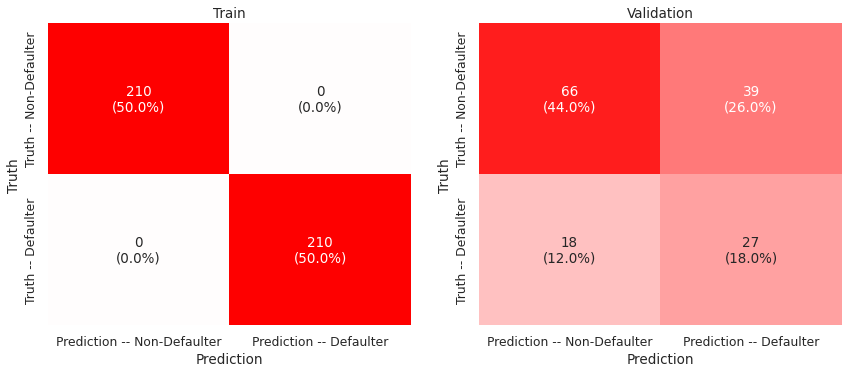

In [97]:
# Reconstructing the training data
y_recon = rfc_under.predict(X_train_under)
# Making prediction on validation set
y_pred  = rfc_under.predict(X_valid)

# Plotting the confusion matrices
plt.figure(figsize = (12, 5.4));
plt.subplot(121);
plot_cm(y_train_under, y_recon);
plt.title('Train');
plt.subplot(122);
plot_cm(y_valid, y_pred);
plt.title('Validation');
plt.tight_layout(w_pad = 2);

In [98]:
# Reporting the evaluation metrics on train and validation sets
rfc_under_perform = model_eval(rfc_under, X_train_under, X_valid, y_train_under, y_valid)
rfc_under_perform

,Accuracy,Recall,Precision,F1,Specificity
Train,1.000,1.000,1.000,1.000,1.000
Validation,0.620,0.600,0.409,0.486,0.629


In [99]:
# Finding the region of uncertainty for the model performance

# Dividing training data into 10 random folds
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)

# cross-validation results
cv_results = cross_val_score(rfc_under, X_train_under, y_train_under, scoring = 'recall', cv = kfold)
cv_mean = cv_results.mean()
cv_std  = cv_results.std() 

# Reporting the model's average performance and confidence interval
print('The average recall score of the model is {} and, with 95% certainty, its recall score resides between {} and {}.'
      .format(round(cv_mean, 3), round(cv_mean-2*cv_std, 3), round(cv_mean+2*cv_std, 3))) 

The average recall score of the model is 0.643 and, with 95% certainty, its recall score resides between 0.397 and 0.888.


**`Adaptive Boosting Classifier`**

In [100]:
# Building the model on undersampled data
abc_under = AdaBoostClassifier(random_state = 1)
abc_under = abc_under.fit(X_train_under, y_train_under)

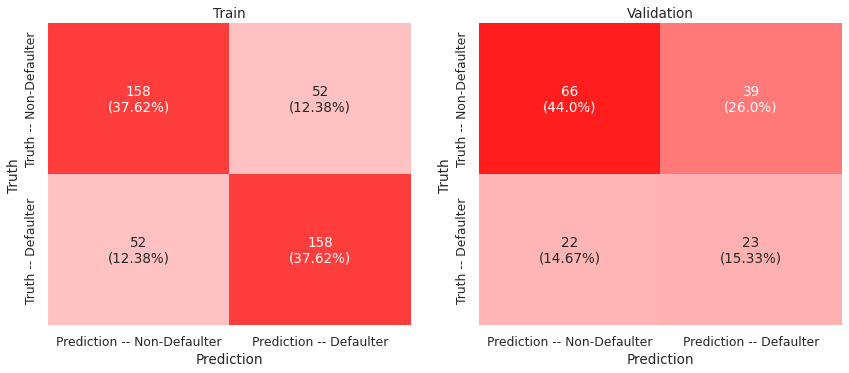

In [101]:
# Reconstructing the training data
y_recon = abc_under.predict(X_train_under)
# Making prediction on validation set
y_pred  = abc_under.predict(X_valid)

# Plotting the confusion matrices
plt.figure(figsize = (12, 5.4));
plt.subplot(121);
plot_cm(y_train_under, y_recon);
plt.title('Train');
plt.subplot(122);
plot_cm(y_valid, y_pred);
plt.title('Validation');
plt.tight_layout(w_pad = 2);

In [102]:
# Reporting the evaluation metrics on train and validation sets
abc_under_perform = model_eval(abc_under, X_train_under, X_valid, y_train_under, y_valid)
abc_under_perform

,Accuracy,Recall,Precision,F1,Specificity
Train,0.752,0.752,0.752,0.752,0.752
Validation,0.593,0.511,0.371,0.430,0.629


In [103]:
# Finding the region of uncertainty for the model performance

# Dividing training data into 10 random folds
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)

# cross-validation results
cv_results = cross_val_score(abc_under, X_train_under, y_train_under, scoring = 'recall', cv = kfold)
cv_mean = cv_results.mean()
cv_std  = cv_results.std() 

# Reporting the model's average performance and confidence interval
print('The average recall score of the model is {} and, with 95% certainty, its recall score resides between {} and {}.'
      .format(round(cv_mean, 3), round(cv_mean-2*cv_std, 3), round(cv_mean+2*cv_std, 3))) 

The average recall score of the model is 0.657 and, with 95% certainty, its recall score resides between 0.499 and 0.815.


**`Gradient Boosting Classifier`**

In [104]:
# Building the model on undersampled data
gbc_under = GradientBoostingClassifier(random_state = 1)
gbc_under = gbc_under.fit(X_train_under, y_train_under)

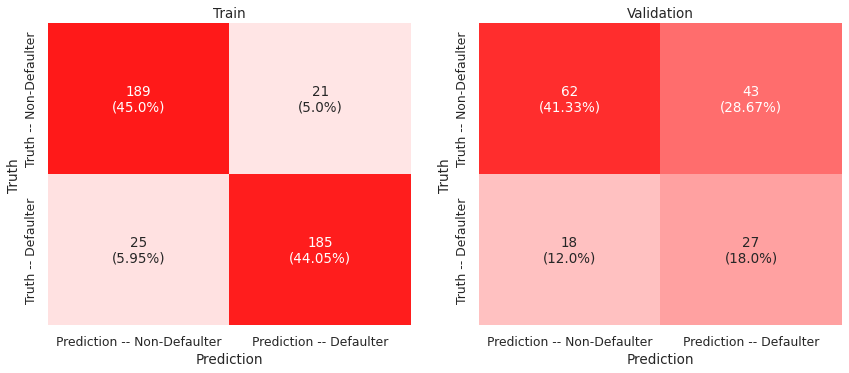

In [105]:
# Reconstructing the training data
y_recon = gbc_under.predict(X_train_under)
# Making prediction on validation set
y_pred  = gbc_under.predict(X_valid)

# Plotting the confusion matrices
plt.figure(figsize = (12, 5.4));
plt.subplot(121);
plot_cm(y_train_under, y_recon);
plt.title('Train');
plt.subplot(122);
plot_cm(y_valid, y_pred);
plt.title('Validation');
plt.tight_layout(w_pad = 2);

In [106]:
# Reporting the evaluation metrics on train and validation sets
gbc_under_perform = model_eval(gbc_under, X_train_under, X_valid, y_train_under, y_valid)
gbc_under_perform

,Accuracy,Recall,Precision,F1,Specificity
Train,0.890,0.881,0.898,0.889,0.900
Validation,0.593,0.600,0.386,0.470,0.590


In [107]:
# Finding the region of uncertainty for the model performance

# Dividing training data into 10 random folds
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)

# cross-validation results
cv_results = cross_val_score(gbc_under, X_train_under, y_train_under, scoring = 'recall', cv = kfold)
cv_mean = cv_results.mean()
cv_std  = cv_results.std() 

# Reporting the model's average performance and confidence interval
print('The average recall score of the model is {} and, with 95% certainty, its recall score resides between {} and {}.'
      .format(round(cv_mean, 3), round(cv_mean-2*cv_std, 3), round(cv_mean+2*cv_std, 3))) 

The average recall score of the model is 0.6 and, with 95% certainty, its recall score resides between 0.404 and 0.796.


**`XGBoost Classifier`**

In [108]:
# Building the model on undersampled data
xgbc_under = XGBClassifier(random_state = 1, eval_metric = 'logloss')
xgbc_under = xgbc_under.fit(X_train_under, y_train_under)

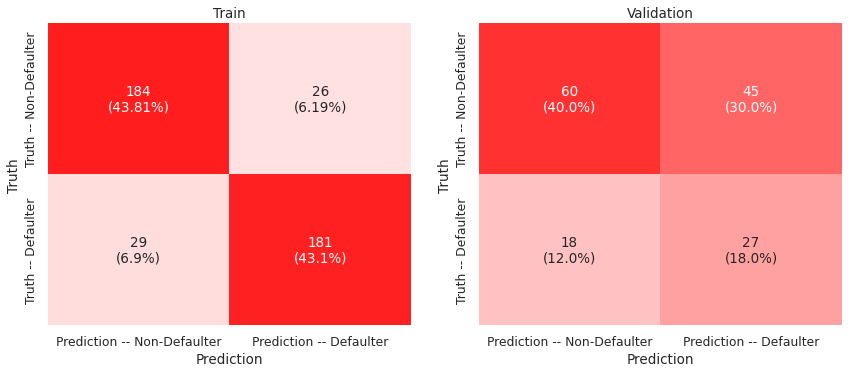

In [109]:
# Reconstructing the training data
y_recon = xgbc_under.predict(X_train_under)
# Making prediction on validation set
y_pred  = xgbc_under.predict(X_valid)

# Plotting the confusion matrices
plt.figure(figsize = (12, 5.4));
plt.subplot(121);
plot_cm(y_train_under, y_recon);
plt.title('Train');
plt.subplot(122);
plot_cm(y_valid, y_pred);
plt.title('Validation');
plt.tight_layout(w_pad = 2);

In [110]:
# Reporting the evaluation metrics on train and validation sets
xgbc_under_perform = model_eval(xgbc_under, X_train_under, X_valid, y_train_under, y_valid)
xgbc_under_perform

,Accuracy,Recall,Precision,F1,Specificity
Train,0.869,0.862,0.874,0.868,0.876
Validation,0.580,0.600,0.375,0.462,0.571


In [111]:
# Finding the region of uncertainty for the model performance

# Dividing training data into 10 random folds
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)

# cross-validation results
cv_results = cross_val_score(xgbc_under, X_train_under, y_train_under, scoring = 'recall', cv = kfold)
cv_mean = cv_results.mean()
cv_std  = cv_results.std() 

# Reporting the model's average performance and confidence interval
print('The average recall score of the model is {} and, with 95% certainty, its recall score resides between {} and {}.'
      .format(round(cv_mean, 3), round(cv_mean-2*cv_std, 3), round(cv_mean+2*cv_std, 3))) 

The average recall score of the model is 0.652 and, with 95% certainty, its recall score resides between 0.439 and 0.866.


**`Comparison`**

In [112]:
# Comparison of all oversampled models on validation set
undersampled_compare = pd.concat([lgc_under_perform, rfc_under_perform, abc_under_perform, 
                              gbc_under_perform, xgbc_under_perform])[1::2]
undersampled_compare.index = ['Logistic Regression', 'Random Forest', 'AdaBoost',
                          'Gradient Boosting', 'XGBoost']
undersampled_compare

,Accuracy,Recall,Precision,F1,Specificity
Logistic Regression,0.620,0.511,0.397,0.447,0.667
Random Forest,0.620,0.600,0.409,0.486,0.629
AdaBoost,0.593,0.511,0.371,0.430,0.629
Gradient Boosting,0.593,0.600,0.386,0.470,0.590
XGBoost,0.580,0.600,0.375,0.462,0.571


#### Observations:

Undersampling has further improved the recall scores of all models, but hasn't resolved the issue of overfitting, and has further widened the region of uncertainty of models calculated using cross-validation. The latter makes sense since the number of training recors is smaller for undersampled models. 

### Comparison of All Models 

*   Here, we first compare all 15 models built thus far on the validation set. We then proceed to choose the best model (baseline, oversampled or undersampled) for each model type using cross-validation.
*   The lower limit and upper-limit refer to the lower and upper limits of the 95% confidence interval of recall score, respectively.

**`Comparison on Validation Set`**



In [113]:
all_compare = pd.concat([baseline_compare, oversampled_compare, undersampled_compare])
all_compare.index = ['Logistic Regression (Baseline)', 'Random Forest (Baseline)', 'AdaBoost (Baseline)',
                     'Gradient Boosting (Baseline)', 'XGBoost (Baseline)', 
                     'Logistic Regression (Oversampled)', 'Random Forest (Oversampled)', 'AdaBoost (Oversampled)',
                     'Gradient Boosting (Oversampled)', 'XGBoost (Oversampled)',
                     'Logistic Regression (Undersampled)', 'Random Forest (Undersampled)', 'AdaBoost (Undersampled)',
                     'Gradient Boosting (Undersampled)', 'XGBoost (Undersampled)']
all_compare.sort_values(by = 'Recall', ascending = False)         

,Accuracy,Recall,Precision,F1,Specificity
Random Forest (Undersampled),0.620,0.600,0.409,0.486,0.629
Gradient Boosting (Undersampled),0.593,0.600,0.386,0.470,0.590
XGBoost (Undersampled),0.580,0.600,0.375,0.462,0.571
Logistic Regression (Undersampled),0.620,0.511,0.397,0.447,0.667
AdaBoost (Undersampled),0.593,0.511,0.371,0.430,0.629
XGBoost (Oversampled),0.653,0.444,0.426,0.435,0.743
Logistic Regression (Oversampled),0.653,0.400,0.419,0.409,0.762
Random Forest (Oversampled),0.647,0.400,0.409,0.404,0.752
AdaBoost (Oversampled),0.647,0.400,0.409,0.404,0.752
Gradient Boosting (Oversampled),0.627,0.400,0.383,0.391,0.724


#### Observations:

*   Merely based on recall score on validation set, undersampled models are the best for each model type.
*   All oversampled models outperform all undersampled models (recall-score-wise), and all undersampled models have higher recall scores than all baseline models. 

**`Logistic Regression (Cross-Validation)`**

In [114]:
# List of models
lg_models = [lgc0, lgc_over, lgc_under]
# List of training sets
X_training = [X_train, X_train_over, X_train_under]
y_training = [y_train, y_train_over, y_train_under]

# Comparison dataframe of baseline, oversampled and undersampled models
df_recall = pd.DataFrame(index = ['Baseline', 'Oversampled', 'Undersampled'],
                         columns = ['Lower Limit', 'Average Recall', 'Upper Limit'])

# Setting the folding strategy required for cross-validation
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)

for i, model in enumerate(lg_models):
    # Picking the proper training data
    X_cv = X_training[i].copy() 
    y_cv = y_training[i].copy() 
    # Calculating cross-validated recall scores
    cv_results = cross_val_score(model, X_cv, y_cv, scoring = 'recall', cv = kfold)
    cv_mean = cv_results.mean()
    cv_std  = cv_results.std()
    # Inserting results into dataframe
    df_recall.iloc[i, :] = [cv_mean-2*cv_std, cv_mean, cv_mean+2*cv_std]

df_recall  

,Lower Limit,Average Recall,Upper Limit
Baseline,0.077,0.233,0.390
Oversampled,0.602,0.688,0.773
Undersampled,0.454,0.619,0.784


**`Random Forest Classifier (Cross-Validation)`**

In [115]:
# List of models
rf_models = [rfc0, rfc_over, rfc_under]
# List of training sets
X_training = [X_train, X_train_over, X_train_under]
y_training = [y_train, y_train_over, y_train_under]

# Comparison dataframe of baseline, oversampled and undersampled models
df_recall = pd.DataFrame(index = ['Baseline', 'Oversampled', 'Undersampled'],
                         columns = ['Lower Limit', 'Average Recall', 'Upper Limit'])

# Setting the folding strategy required for cross-validation
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)

for i, model in enumerate(rf_models):
    # Picking the proper training data
    X_cv = X_training[i].copy() 
    y_cv = y_training[i].copy() 
    # Calculating cross-validated recall scores
    cv_results = cross_val_score(model, X_cv, y_cv, scoring = 'recall', cv = kfold)
    cv_mean = cv_results.mean()
    cv_std  = cv_results.std()
    # Inserting results into dataframe
    df_recall.iloc[i, :] = [cv_mean-2*cv_std, cv_mean, cv_mean+2*cv_std]

df_recall  

,Lower Limit,Average Recall,Upper Limit
Baseline,0.166,0.314,0.463
Oversampled,0.647,0.761,0.875
Undersampled,0.397,0.643,0.888


**`Adaptive Boosting Classifier (Cross-Validation)`**

In [116]:
# List of models
ab_models = [abc0, abc_over, abc_under]
# List of training sets
X_training = [X_train, X_train_over, X_train_under]
y_training = [y_train, y_train_over, y_train_under]

# Comparison dataframe of baseline, oversampled and undersampled models
df_recall = pd.DataFrame(index = ['Baseline', 'Oversampled', 'Undersampled'],
                         columns = ['Lower Limit', 'Average Recall', 'Upper Limit'])

# Setting the folding strategy required for cross-validation
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)

for i, model in enumerate(ab_models):
    # Picking the proper training data
    X_cv = X_training[i].copy() 
    y_cv = y_training[i].copy() 
    # Calculating cross-validated recall scores
    cv_results = cross_val_score(model, X_cv, y_cv, scoring = 'recall', cv = kfold)
    cv_mean = cv_results.mean()
    cv_std  = cv_results.std()
    # Inserting results into dataframe
    df_recall.iloc[i, :] = [cv_mean-2*cv_std, cv_mean, cv_mean+2*cv_std]

df_recall  

,Lower Limit,Average Recall,Upper Limit
Baseline,0.070,0.300,0.530
Oversampled,0.653,0.743,0.833
Undersampled,0.499,0.657,0.815


**`Gradient Boosting Classifier (Cross-Validation)`**

In [117]:
# List of models
gb_models = [gbc0, gbc_over, gbc_under]
# List of training sets
X_training = [X_train, X_train_over, X_train_under]
y_training = [y_train, y_train_over, y_train_under]

# Comparison dataframe of baseline, oversampled and undersampled models
df_recall = pd.DataFrame(index = ['Baseline', 'Oversampled', 'Undersampled'],
                         columns = ['Lower Limit', 'Average Recall', 'Upper Limit'])

# Setting the folding strategy required for cross-validation
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)

for i, model in enumerate(gb_models):
    # Picking the proper training data
    X_cv = X_training[i].copy() 
    y_cv = y_training[i].copy() 
    # Calculating cross-validated recall scores
    cv_results = cross_val_score(model, X_cv, y_cv, scoring = 'recall', cv = kfold)
    cv_mean = cv_results.mean()
    cv_std  = cv_results.std()
    # Inserting results into dataframe
    df_recall.iloc[i, :] = [cv_mean-2*cv_std, cv_mean, cv_mean+2*cv_std]

df_recall  

,Lower Limit,Average Recall,Upper Limit
Baseline,0.182,0.348,0.513
Oversampled,0.685,0.767,0.849
Undersampled,0.404,0.600,0.796


**`XGBoost Classifier (Cross-Validation)`**

In [118]:
# List of models
xgb_models = [xgbc0, xgbc_over, xgbc_under]
# List of training sets
X_training = [X_train, X_train_over, X_train_under]
y_training = [y_train, y_train_over, y_train_under]

# Comparison dataframe of baseline, oversampled and undersampled models
df_recall = pd.DataFrame(index = ['Baseline', 'Oversampled', 'Undersampled'],
                         columns = ['Lower Limit', 'Average Recall', 'Upper Limit'])

# Setting the folding strategy required for cross-validation
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)

for i, model in enumerate(xgb_models):
    # Picking the proper training data
    X_cv = X_training[i].copy() 
    y_cv = y_training[i].copy() 
    # Calculating cross-validated recall scores
    cv_results = cross_val_score(model, X_cv, y_cv, scoring = 'recall', cv = kfold)
    cv_mean = cv_results.mean()
    cv_std  = cv_results.std()
    # Inserting results into dataframe
    df_recall.iloc[i, :] = [cv_mean-2*cv_std, cv_mean, cv_mean+2*cv_std]

df_recall  

,Lower Limit,Average Recall,Upper Limit
Baseline,0.240,0.362,0.484
Oversampled,0.688,0.757,0.827
Undersampled,0.439,0.652,0.866


#### Observations:

*   Undersampled models have the highest recall scores on the validation set and fairly high cross-validation scores. Therefore, they'll be chosen for hyperparameter tuning.
*   The huge gap between the validation and cross-validation recall scores of oversampled models is another sign of severe overfitting problem of these models.

### Hyperparameter Tuning

**`Logistic Regression`**

In [119]:
# Defining the base model
base_estimator = lgc_under
# Picking the compatible training data
X_cv = X_train_under.copy()
y_cv = y_train_under.copy()

# Setting the range of hyperparameters
hyperparams = {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 0.5, 1, 2, 5]}

# Setting the measure of performance
acc_criterion = make_scorer(recall_score)

# Fill grid search over the given range of hyperparameters
all_models = GridSearchCV(estimator = base_estimator, param_grid = hyperparams,
                          scoring = acc_criterion, cv = 5, verbose = 1, n_jobs = -1)
all_models = all_models.fit(X_cv, y_cv)

# Picking the best-performing model
lgc_tuned = all_models.best_estimator_
lgc_tuned = lgc_tuned.fit(X_cv, y_cv)
# Reporting the hyperparameters of the best model
all_models.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'C': 5, 'penalty': 'l2'}

In [120]:
# Performance on training and validation sets
lgc_tuned_perform = model_eval(lgc_tuned, X_cv, X_valid, y_cv, y_valid) 
lgc_tuned_perform

,Accuracy,Recall,Precision,F1,Specificity
Train,0.660,0.643,0.665,0.654,0.676
Validation,0.607,0.511,0.383,0.438,0.648


#### Observations:

Tuning has had an insignificant impact on the performance parameters, but we should recall that this model was less afflicted by overfitting.

**`Random Forest Classifier`**

In [121]:
# Defining the base model
base_estimator = rfc_under
# Picking the compatible training data
X_cv = X_train_under.copy()
y_cv = y_train_under.copy()

# Setting the range of hyperparameters
hyperparams = {'n_estimators': [50, 100, 150, 200], 'max_features': [0.5, 0.65, 0.8, 1],
               'max_samples': [0.5, 0.65, 0.8, 1], 'max_depth': np.arange(2, 5),
               'min_samples_leaf': [3, 5, 10, 15, 20],
               'min_impurity_decrease': [1e-4, 1e-3, 0.01, 0.1]}

# Setting the measure of performance
acc_criterion = make_scorer(recall_score)

# Random search over the given range of hyperparameters
all_models = RandomizedSearchCV(estimator = base_estimator, param_distributions = hyperparams,
                                n_iter = 100, scoring = acc_criterion, cv = 5, verbose = 1, n_jobs = -1)
all_models = all_models.fit(X_cv, y_cv)

# Picking the best-performing model
rfc_tuned = all_models.best_estimator_
rfc_tuned = rfc_tuned.fit(X_cv, y_cv)
# Reporting the hyperparameters of the best model
all_models.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'n_estimators': 100,
 'min_samples_leaf': 5,
 'min_impurity_decrease': 0.1,
 'max_samples': 1,
 'max_features': 1,
 'max_depth': 2}

In [122]:
# Performance on training and validation sets
rfc_tuned_perform = model_eval(rfc_tuned, X_cv, X_valid, y_cv, y_valid) 
rfc_tuned_perform

,Accuracy,Recall,Precision,F1,Specificity
Train,0.500,1.000,0.500,0.667,0.000
Validation,0.300,1.000,0.300,0.462,0.000


#### Observations:

Although recall is 1, but what model has done is to label all records 1, which no data-driven modeling. So, despite the highest recall on validation, the random forest classifier is useless and thus out! 

**`Adaptive Boosting Classifier`**

In [123]:
# Defining the base model
base_estimator = abc_under
# Picking the compatible training data
X_cv = X_train_under.copy()
y_cv = y_train_under.copy()

# Setting the range of hyperparameters
hyperparams = {'base_estimator': [DecisionTreeClassifier(max_depth = 1, random_state = 1),
                                  DecisionTreeClassifier(max_depth = 2, random_state = 1),
                                  DecisionTreeClassifier(max_depth = 3, random_state = 1)],
                'n_estimators': [25, 50, 100, 150, 200], 'learning_rate': np.arange(0.2, 2.2, 0.2)
              }

# Setting the measure of performance
acc_criterion = make_scorer(recall_score)

# Random search over the given range of hyperparameters
all_models = RandomizedSearchCV(estimator = base_estimator, param_distributions = hyperparams,
                                n_iter = 50, scoring = acc_criterion, cv = 5, verbose = 1, n_jobs = -1)
all_models = all_models.fit(X_cv, y_cv)

# Picking the best-performing model
abc_tuned = all_models.best_estimator_
abc_tuned = abc_tuned.fit(X_cv, y_cv)
# Reporting the hyperparameters of the best model
all_models.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


{'n_estimators': 50,
 'learning_rate': 0.2,
 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)}

In [124]:
# Performance on training and validation sets
abc_tuned_perform = model_eval(abc_tuned, X_cv, X_valid, y_cv, y_valid) 
abc_tuned_perform

,Accuracy,Recall,Precision,F1,Specificity
Train,0.971,0.967,0.976,0.971,0.976
Validation,0.633,0.622,0.424,0.505,0.638


#### Observations:

The performance on validation set has been somewhat improved, but overfitting problem has been exacerbated.

**`Gradient Boosting Classifier`**

In [125]:
# Defining the base model
base_estimator = gbc_under
# Picking the compatible training data
X_cv = X_train_under.copy()
y_cv = y_train_under.copy()

# Setting the range of hyperparameters
hyperparams = {'n_estimators': [50, 100, 150, 200], 'learning_rate': [0.02, 0.1, 0.2, 0.5],
               'max_features': [0.5, 0.65, 0.8, 1], 'subsample': [0.5, 0.65, 0.8, 1], 
               'max_depth': np.arange(3, 7), 'min_samples_split': [4, 7, 15, 20],
               'min_impurity_decrease': [1e-4, 1e-3, 0.01, 0.1]}

# Setting the measure of performance
acc_criterion = make_scorer(recall_score)

# Random search over the given range of hyperparameters
all_models = RandomizedSearchCV(estimator = base_estimator, param_distributions = hyperparams,
                                n_iter = 100, scoring = acc_criterion, cv = 5, verbose = 1, n_jobs = -1)
all_models = all_models.fit(X_cv, y_cv)

# Picking the best-performing model
gbc_tuned = all_models.best_estimator_
gbc_tuned = gbc_tuned.fit(X_cv, y_cv)
# Reporting the hyperparameters of the best model
all_models.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'subsample': 0.65,
 'n_estimators': 50,
 'min_samples_split': 7,
 'min_impurity_decrease': 0.1,
 'max_features': 0.5,
 'max_depth': 5,
 'learning_rate': 0.2}

In [126]:
# Performance on training and validation sets
gbc_tuned_perform = model_eval(gbc_tuned, X_cv, X_valid, y_cv, y_valid) 
gbc_tuned_perform

,Accuracy,Recall,Precision,F1,Specificity
Train,0.969,0.986,0.954,0.970,0.952
Validation,0.567,0.556,0.357,0.435,0.571


#### Observations:

Not only hasn't tuning has improved the performance on validation set, it has also slightly worsened the problem of overfitting! 

**`XGBoost Classifier`**

In [127]:
# Defining the base model
base_estimator = xgbc_under
# Picking the compatible training data
X_cv = X_train_under.copy()
y_cv = y_train_under.copy()

# Setting the range of hyperparameters
hyperparams = {'n_estimators': [50, 100, 150, 200], 'learning_rate': np.arange(0.1, 1.1, 0.1),
               'subsample': [0.5, 0.65, 0.8, 1], 'colsample_bytree': np.arange(0.4, 1.1, 0.2),  
               'colsample_bylevel': np.arange(0.4, 1.1, 0.2), 'gamma': np.arange(0, 5),
               'max_depth': np.arange(3, 7), 'min_samples_split': [4, 7, 15, 20],
               'min_impurity_decrease': [1e-4, 1e-3, 0.01, 0.1]}

# Setting the measure of performance
acc_criterion = make_scorer(recall_score)

# Random search over the given range of hyperparameters
all_models = RandomizedSearchCV(estimator = base_estimator, param_distributions = hyperparams,
                                n_iter = 100, scoring = acc_criterion, cv = 5, verbose = 1, n_jobs = -1)
all_models = all_models.fit(X_cv, y_cv)

# Picking the best-performing model
xgbc_tuned = all_models.best_estimator_
xgbc_tuned = xgbc_tuned.fit(X_cv, y_cv)
# Reporting the hyperparameters of the best model
all_models.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'subsample': 1,
 'n_estimators': 50,
 'min_samples_split': 15,
 'min_impurity_decrease': 0.0001,
 'max_depth': 4,
 'learning_rate': 0.2,
 'gamma': 0,
 'colsample_bytree': 0.6000000000000001,
 'colsample_bylevel': 0.6000000000000001}

In [128]:
# Performance on training and validation sets
xgbc_tuned_perform = model_eval(xgbc_tuned, X_cv, X_valid, y_cv, y_valid) 
xgbc_tuned_perform

,Accuracy,Recall,Precision,F1,Specificity
Train,0.895,0.905,0.888,0.896,0.886
Validation,0.600,0.578,0.388,0.464,0.610


#### Observations:

The performance metrics on validationset has somewhat degraded and, unfortunately, the performance gap on training and validation sets has been widened.

## Model Performance Comparison 

*   Here, we first compare the performances of all tuned models on test set. We then compare their cross-validated scores and confidence intervals.
*   Note that for the reasons discussed above, RFC hasn't been included.

**`Test Set`**

In [130]:
# Making a list of all tuned models
tuned_models = [lgc_tuned, abc_tuned, gbc_tuned, xgbc_tuned]

# Defining the comparison dataframe
test_compare = pd.DataFrame(index = ['Logistic Regression', 'AdaBoost', 'Gradient Boosting', 'XGBoost'],
                            columns = baseline_compare.columns.tolist())

# Looping over all models
for i, model in enumerate(tuned_models):
    tuned_perform = model_eval(model, X_train_under, X_test, y_train_under, y_test, valid = False)
    test_compare.iloc[i, :] = tuned_perform.iloc[1, :]

test_compare.sort_values(by = 'Recall', ascending = False)

,Accuracy,Recall,Precision,F1,Specificity
Logistic Regression,0.687,0.756,0.486,0.591,0.657
AdaBoost,0.640,0.711,0.438,0.542,0.610
XGBoost,0.620,0.667,0.417,0.513,0.600
Gradient Boosting,0.640,0.600,0.429,0.500,0.657


**`Cross-Validation`**

In [131]:
# List of models
tuned_models = [lgc_tuned, abc_tuned, gbc_tuned, xgbc_tuned]

# Comparison dataframe of baseline, oversampled and undersampled models
df_cv_recall = pd.DataFrame(index = test_compare.index.tolist(),
                         columns = ['Lower Limit', 'Average Recall', 'Upper Limit'])

# Setting the folding strategy required for cross-validation
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)

for i, model in enumerate(tuned_models):
    # Calculating cross-validated recall scores
    cv_results = cross_val_score(model, X_train_under, y_train_under, scoring = 'recall', cv = kfold)
    cv_mean = cv_results.mean()
    cv_std  = cv_results.std()
    # Inserting results into dataframe
    df_cv_recall.iloc[i, :] = [cv_mean-2*cv_std, cv_mean, cv_mean+2*cv_std]

df_cv_recall  

,Lower Limit,Average Recall,Upper Limit
Logistic Regression,0.425,0.610,0.794
AdaBoost,0.431,0.614,0.797
Gradient Boosting,0.381,0.595,0.809
XGBoost,0.447,0.662,0.877


#### Observations:

*   Logistc Regression suffers the least from overfitting, the highest recall score on test set, the most robust and least sensitive performance on different datasets, and cross-validated scores very close to those of XGBoost and adaptive boosting classifiers. For these reasons, we choose ***Logistic Regression Classifier*** as the best-performing and final model.
*   Interestingly, the results on test set are more impressive than those on validation set.



## Impact of Predictors

*   Here, the influence of predictors on the target class (probability of default)  for the best model (Tuned Logistic Regression) is studied. 
*   Since a logistic regression model is linear with respect the log(odds) function, the odds and the percentage of change in them are respectively given by **odds = exp(b)** and **odds = (exp(b) - 1) * 100**, where b is the coefficient of the predictor under study, and the rest of predictors are assumed to remain constant.

In [138]:
# Finding the coefficients of the tuned logistic regression model (the best model)
lgc0_coeffs = lgc0.coef_.flatten()

# Making a dataframe of odds and odds change
coeff_interpret = pd.DataFrame(index = ['Odds', 'Odds Change (%)'], columns = X.columns.tolist())
coeff_interpret.iloc[0, :] = np.exp(lgc0_coeffs) 
coeff_interpret.iloc[1, :] = (np.exp(lgc0_coeffs) - 1)*100 
coeff_interpret

,Age,Credit_amount,Duration,Saving_accounts,Checking_account,Job,Sex_Male,Housing_Own,Housing_Rent,Purpose_Business,Purpose_Car,Purpose_Education,Purpose_Furniture,Purpose_Others,Purpose_Radio/TV,Purpose_Repairs
Odds,0.986,1.000,1.040,0.807,0.538,0.999,0.657,1.187,1.513,1.140,0.854,1.521,0.829,0.992,0.613,1.393
Odds Change (%),-1.372,0.002,3.983,-19.277,-46.210,-0.056,-34.304,18.656,51.332,13.960,-14.612,52.109,-17.142,-0.847,-38.678,39.255


#### Observations:

The size of ***checking account*** is the most influential variable to increase the risk of default for a debtor.

## Productionizing the Best Model

Here, the best model (Tuned XGBoost Classifier) will be deployed in production using Pipeline().

In [139]:
# Making a pipeline for data preprocessing
# Columns required for imputation of checking and saving accounts
cols_req_for_checking_imputation = ['Checking_account', 'Housing_Own', 'Housing_Rent']
cols_req_for_saving_imputation = list(set(X.columns.tolist()) - set(cols_req_for_checking_imputation))

# Defining pipelines for imputation of checking and saving accounts
checking_transformer = Pipeline([('Imputation', checking_imputer), ('Rounding', integer_converter)]);
saving_transformer   = Pipeline([('Imputation', saving_imputer), ('Rounding', integer_converter)]);

impute_pipe = ColumnTransformer([('Checking', checking_transformer, cols_req_for_checking_imputation),
                                 ('Saving', saving_transformer, cols_req_for_saving_imputation)],
                                  remainder = 'passthrough')

# Combining data preprocessing pipeline with modeling
final_pipe = Pipeline([('Preprocessing', impute_pipe), ('Modeling', lgc_tuned)])
final_pipe

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Checking',
                                                  Pipeline(steps=[('Imputation',
                                                                   KNNImputer()),
                                                                  ('Rounding',
                                                                   FunctionTransformer(func=<function my_round at 0x7f85eac9c440>))]),
                                                  ['Checking_account',
                                                   'Housing_Own',
                                                   'Housing_Rent']),
                                                 ('Saving',
                                                  Pipeline(steps=[('Imputation',
                                                                   SimpleImputer(strategy='most_frequent'...
           

In [140]:
# Ensuring the pipeline replicates the results on training and test sets
final_pipe.fit(X_train_under, y_train_under)
final_pipe_perform = model_eval(final_pipe, X_train_under, X_test, y_train_under, y_test, valid = False)
final_pipe_perform

,Accuracy,Recall,Precision,F1,Specificity
Train,0.664,0.657,0.667,0.662,0.671
Test,0.700,0.756,0.500,0.602,0.676
